# Import Core Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import math
import pickle

from os import listdir, walk
from os.path import isfile, join

In [2]:
from detect_peaks import detect_peaks

# Load Dataset

In [3]:
%run load_dataset.ipynb

In [4]:
subj_range = np.hstack((np.arange(1001,1013),np.arange(2002,2003)))

all_subjects = [str(i) for i in subj_range]

In [5]:
subj_range = np.hstack((np.arange(2001,2002),np.arange(3001,3006)))

all_patients = [str(i) for i in subj_range]

In [6]:
print(all_subjects)
print(all_patients)

['1001', '1002', '1003', '1004', '1005', '1006', '1007', '1008', '1009', '1010', '1011', '1012', '2002']
['2001', '3001', '3002', '3003', '3004', '3005']


In [7]:
X_all, y_all, subj_all = load_all_data(all_subjects)

Loading 1001's data


C:\Users\fifamd\Anaconda3\envs\tf\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


Loading 1002's data
Loading 1003's data
Loading 1004's data
Loading 1005's data
Loading 1006's data
Loading 1007's data
Loading 1008's data
Loading 1009's data
Loading 1010's data
Loading 1011's data
Loading 1012's data
Loading 2002's data
Finished loading


In [8]:
X_all_p, y_all_p, subj_all_p = load_all_data(all_patients)

Loading 2001's data
Loading 3001's data
Loading 3002's data
Loading 3003's data
Loading 3004's data
Loading 3005's data
Finished loading


In [9]:
X_all_p.shape

(10998, 3)

# Data Preprocessing

In [23]:
%run preprocessing.ipynb

In [11]:
print(X_all.shape, y_all.shape)

(26716, 3) (26716,)


In [12]:
X_all

array([[-2.99275204e-01, -9.03566837e-01, -6.10765714e-04],
       [-3.04649949e-01, -9.05032653e-01,  4.64181969e-03],
       [-3.01229663e-01, -9.01612347e-01,  2.68736939e-03],
       ...,
       [-8.85488163e-01,  1.68082724e-01,  2.51024714e-01],
       [-9.08941531e-01,  2.15478163e-01,  3.25293837e-01],
       [-9.29463367e-01, -8.44078224e-02,  2.32946041e-01]])

# Group Data by Label and Normalize Data

In [14]:
new_label_list = [0,1,2,3]
new_label_dict = {
    0: 'sit',
    1: 'sleep',
    2: 'stand',
    3: 'walk'
}

colors = ['r','g','b','navy','turquoise','darkorange']

## Show Plot for each Activity and Subject

In [17]:
# plot_all_label(X_label, y_all, new_label_list, new_label_dict)

# Calculate Roll, Pitch, Yaw

In [18]:
roll, pitch, yaw = calc_rpy(X_all, colors)
rpy = np.array([roll, pitch, yaw]).transpose()

print(rpy.shape, y_all.shape)

(26716, 3) (26716,)


In [19]:
roll, pitch, yaw = calc_rpy(X_all_p, colors)
rpy_p = np.array([roll, pitch, yaw]).transpose()

print(rpy_p.shape, y_all_p.shape)

(10998, 3) (10998,)


# Apply PCA

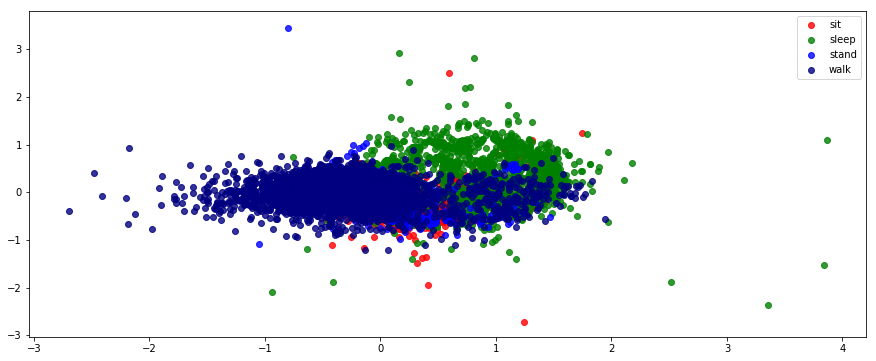

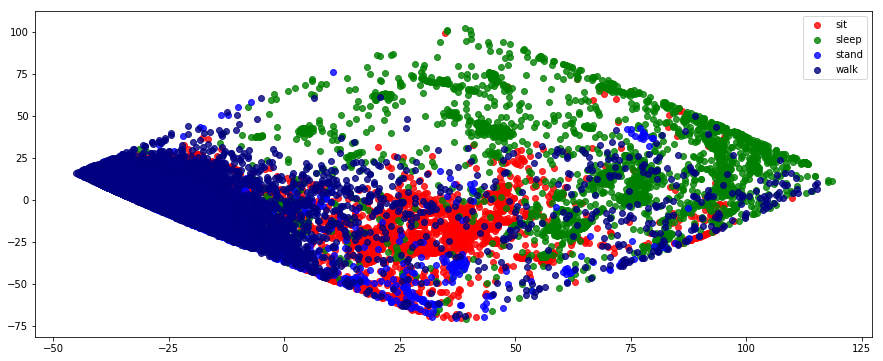

In [24]:
# apply PCA to X_all and rpy
X_pca, pca = apply_pca(X_all, y_all,label_list)
rpy_pca, pca = apply_pca(rpy, y_all, label_list)

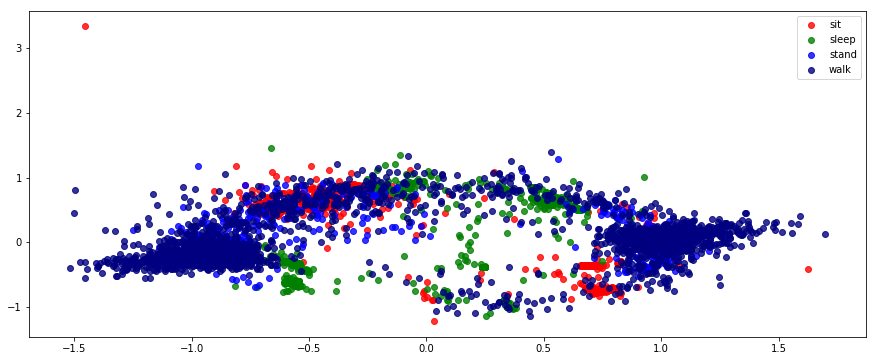

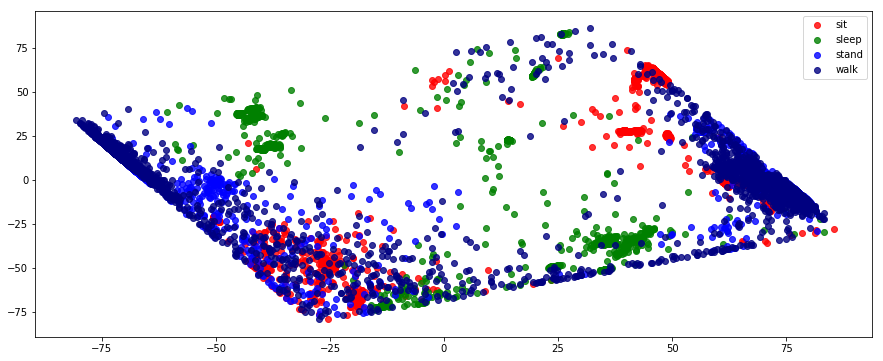

In [25]:
# apply PCA and LDA to X_all and rpy
X_pca_p, pca_p = apply_pca(X_all_p, y_all_p, label_list)
rpy_pca_p, pca_p = apply_pca(rpy_p, y_all_p, label_list)

# Reshape Data (Pure Label)

In [26]:
print(rpy_pca_p.shape, y_all_p.shape, subj_all_p.shape)

(10998, 3) (10998,) (10998,)


In [27]:
# get label-separated X and y
X_pure, y_pure = prepare_pure_label(rpy_pca_p, y_all_p, subj_all_p, all_patients, new_label_list)
y_pure = y_pure.reshape((y_pure.shape[0],))

0 0 (315, 60, 3)
0 1 (315, 60, 3)
0 2 (315, 60, 3)
0 3 (315, 60, 3)
0 4 (315, 60, 3)
0 5 (315, 60, 3)
1 0 (314, 60, 3)
1 1 (315, 60, 3)
1 2 (315, 60, 3)
1 3 (313, 60, 3)
1 4 (321, 60, 3)
1 5 (321, 60, 3)
2 0 (501, 60, 3)
2 1 (514, 60, 3)
2 2 (502, 60, 3)
2 3 (499, 60, 3)
2 4 (502, 60, 3)
2 5 (502, 60, 3)
3 0 (1189, 60, 3)
3 1 (327, 60, 3)
3 2 (315, 60, 3)
3 3 (320, 60, 3)
3 4 (314, 60, 3)
3 5 (308, 60, 3)


In [28]:
print(X_pure.shape, y_pure.shape)

(9582, 180) (9582,)


# Reshape Data (Impure Label)

In [29]:
X_impure, y_impure = prepare_impure_label(rpy_pca_p, y_all_p)

In [30]:
print(X_impure.shape, y_impure.shape)

(10939, 180) (10939,)


# Split Train and Test Set

In [31]:
# Split training data and testing data
X_train, X_test, y_train, y_test = train_test_split(X_pure, y_pure, test_size=0.2, random_state=42)

X_tr, X_te, y_tr, y_te = train_test_split(X_impure, y_impure, test_size=0.2, random_state=42)

print(X_tr.shape)
print(X_te.shape)

(8751, 180)
(2188, 180)


In [32]:
print(X_train.shape)
print(X_test.shape)

(7665, 180)
(1917, 180)


# Find proper thresholds of walk activity

## Patients

In [33]:
X_dict = {
    'id': subj_all_p,
    'x': [X_i[0] for X_i in X_all_p],
    'y': [X_i[1] for X_i in X_all_p],
    'z': [X_i[2] for X_i in X_all_p],
    'x_pca': [X_i_pca[0] for X_i_pca in X_pca_p],
    'y_pca': [X_i_pca[1] for X_i_pca in X_pca_p],
    'z_pca': [X_i_pca[2] for X_i_pca in X_pca_p],
    'roll': [rpy_pca_i[0] for rpy_pca_i in rpy_pca_p],
    'pitch': [rpy_pca_i[1] for rpy_pca_i in rpy_pca_p],
    'yaw': [rpy_pca_i[2] for rpy_pca_i in rpy_pca_p],
    'label': y_all_p
}

df_rpy = pd.DataFrame(X_dict)

In [34]:
df_rpy

id         x         y         z     x_pca     y_pca     z_pca  \
0      2001 -0.363528 -0.920057  0.197522 -0.676597  0.642455 -0.051775   
1      2001 -0.396265 -0.883412  0.212180 -0.690187  0.598579 -0.028978   
2      2001 -0.404571 -0.818426  0.193124 -0.670698  0.533802 -0.037893   
3      2001 -0.396753 -0.926409  0.155501 -0.710681  0.627314 -0.090750   
4      2001 -0.393822 -0.892207  0.199476 -0.692113  0.605323 -0.042961   
5      2001 -0.372323 -0.894161  0.208760 -0.673199  0.617535 -0.036227   
6      2001 -0.403594 -0.872173  0.220486 -0.691782  0.586886 -0.018502   
7      2001 -0.399196 -0.891229  0.210714 -0.696206  0.604112 -0.031217   
8      2001 -0.411412 -0.879991  0.230259 -0.701868  0.592285 -0.009181   
9      2001 -0.415321 -0.872173  0.228793 -0.702130  0.583426 -0.009149   
10     2001 -0.417764 -0.814517  0.257621 -0.678939  0.535682  0.027512   
11     2001 -0.423627 -0.878525  0.202408 -0.713175  0.581233 -0.035201   
12     2001 -0.417764 -0.899536  0.141331 -0.718722  0.592191 -0.098883   
13     2001 -0.412389 -0.891229  0.161853 -0.709683  0.590436 -0.078044   
14     2001 -0.415809 -0.865333  0.182863 -0.701115  0.569385 -0.053403   
15     2001 -0.409457 -0.888298  0.180909 -0.705185  0.592230 -0.059154   
16     2001 -0.413855 -0.879991  0.179443 -0.705681  0.582732 -0.059005   
17     2001 -0.415809 -0.891718  0.182375 -0.712338  0.592905 -0.057552   
18     2001 -0.407014 -0.895138  0.167716 -0.706296  0.597144 -0.073346   
19     2001 -0.413855 -0.877060  0.189215 -0.704127  0.581752 -0.048969   
20     2001 -0.409946 -0.895627  0.170648 -0.709064  0.596859 -0.070233   
21     2001 -0.418741 -0.887321  0.180909 -0.713169  0.587511 -0.058093   
22     2001 -0.419230 -0.883412  0.175534 -0.712120  0.582909 -0.062796   
23     2001 -0.416787 -0.882923  0.183352 -0.709455  0.584797 -0.055269   
24     2001 -0.419718 -0.890741  0.169671 -0.715860  0.588277 -0.069544   
25     2001 -0.420207 -0.884877  0.169671 -0.713812  0.582830 -0.068680   
26     2001 -0.416787 -0.887321  0.168693 -0.711786  0.586267 -0.070323   
27     2001 -0.400662 -0.892207  0.167228 -0.699319  0.597070 -0.074053   
28     2001 -0.413366 -0.890252  0.157944 -0.710276  0.588500 -0.081662   
29     2001 -0.408969 -0.891229  0.158921 -0.706681  0.591359 -0.081273   
...     ...       ...       ...       ...       ...       ...       ...   
10968  3005  0.970018  0.297687  0.409702  1.053893  0.141048  0.193707   
10969  3005  0.840047  0.275211  0.442439  0.927788  0.112830  0.235784   
10970  3005  0.962689  0.225861  0.203996  1.010263  0.167691 -0.018223   
10971  3005  0.684180  0.178954  0.166373  0.737171  0.087986 -0.034068   
10972  3005  1.159600  0.115435  0.216211  1.141895  0.350076 -0.041152   
10973  3005  1.212370  0.164785  0.356443  1.215025  0.351354  0.098617   
10974  3005  0.835161  0.273257  0.358397  0.919886  0.098430  0.153196   
10975  3005  0.943144  0.395898  0.505470  1.074319  0.058159  0.304393   
10976  3005  1.005687  0.311857  0.301718  1.088777  0.124995  0.085731   
10977  3005  0.907476  0.155501  0.074025  0.926321  0.185922 -0.150559   
10978  3005  0.691998  0.163319  0.151714  0.737140  0.102747 -0.051463   
10979  3005  1.021322  0.199476  0.159532  1.050701  0.208104 -0.071540   
10980  3005  1.401463  0.300130  0.399441  1.444955  0.315817  0.140959   
10981  3005  0.756983  0.339219  0.284617  0.874847 -0.005355  0.097459   
10982  3005  0.963178  0.418863  0.279731  1.095078  0.007971  0.083176   
10983  3005  0.990051  0.288892  0.225495  1.062471  0.126251  0.008995   
10984  3005  1.026697  0.332379  0.052037  1.108627  0.073373 -0.159513   
10985  3005  0.708610  0.282540  0.102364  0.801257 -0.005318 -0.085169   
10986  3005  0.790209  0.259575  0.213279  0.868826  0.067661  0.012792   
10987  3005  0.807310  0.304528  0.317354  0.906677  0.052023  0.119878   
10988  3005  0.828321  0.386126  0.252857  0.958313 -0.023111  0.065581   
10989  3005  0.861058  0.362184  0

In [35]:
df_walk = df_rpy[df_rpy['label']==label_dict['walk']]
df_walk = df_walk.reset_index(drop=True)

In [36]:
df_nonwalk = df_rpy[df_rpy['label']!=label_dict['walk']]
df_nonwalk = df_nonwalk.reset_index(drop=True)

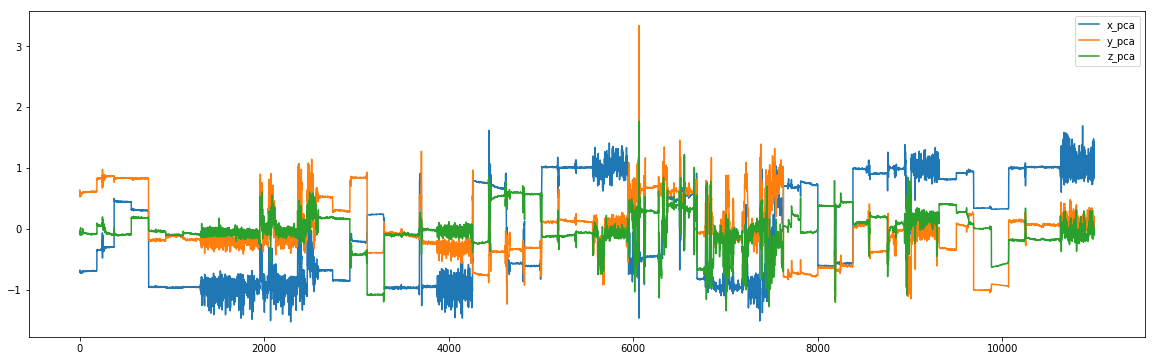

In [37]:
cols = ['x_pca', 'y_pca', 'z_pca']

df_rpy[cols].plot(figsize=(20,6))
plt.show()

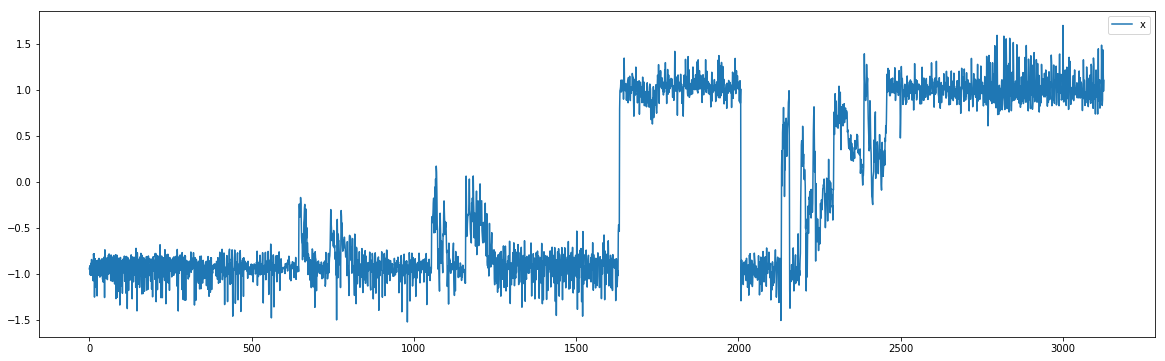

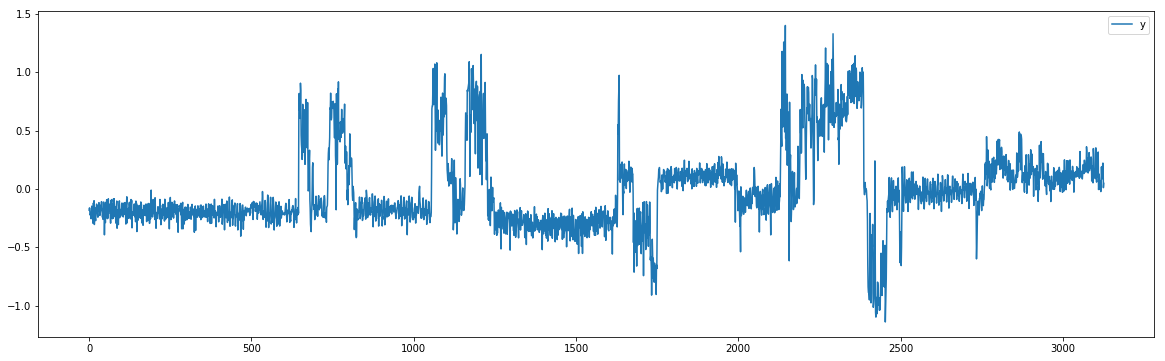

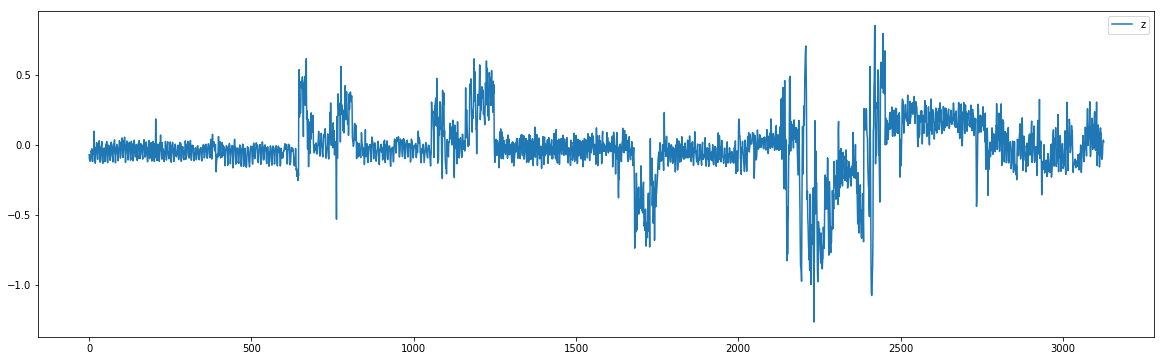

In [38]:
cols = ['x_pca', 'y_pca', 'z_pca']

for c in cols:
    f, ax = plt.subplots()
    df_walk[c].plot(figsize=(20,6), ax=ax)
    ax.legend(c)
    
    plt.show()

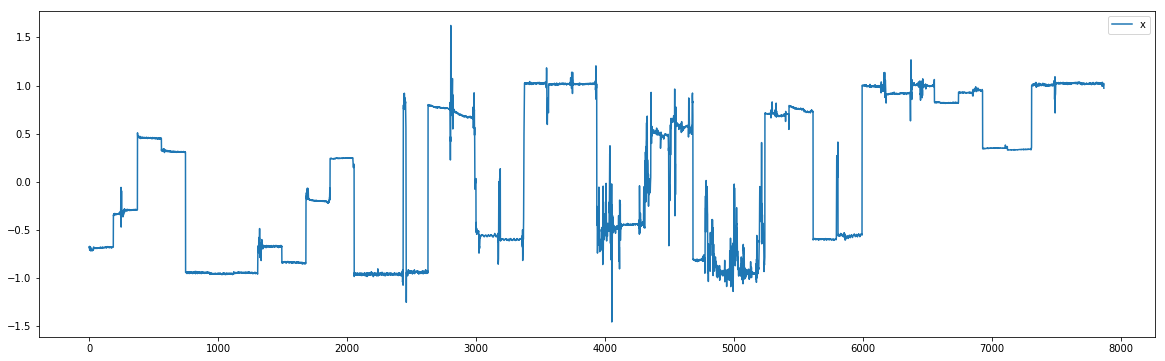

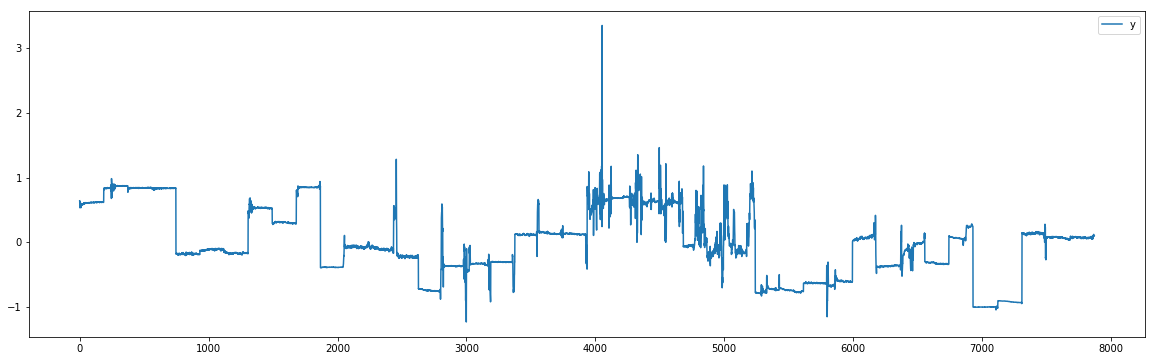

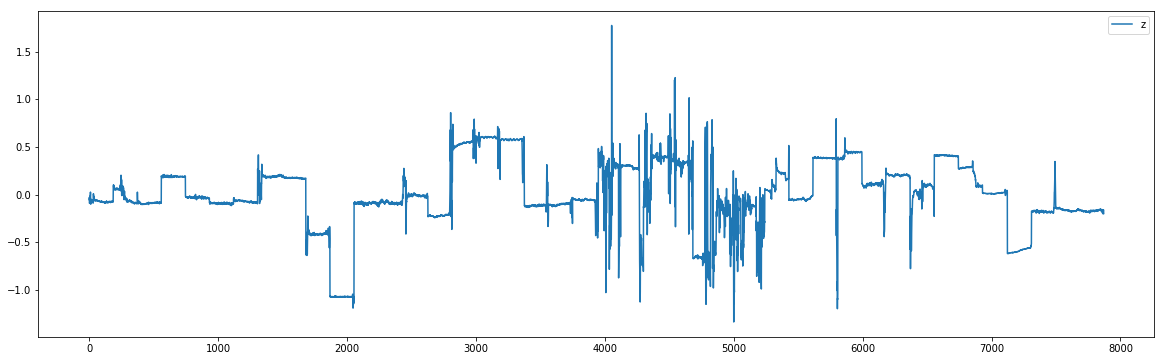

In [39]:
cols = ['x_pca', 'y_pca', 'z_pca']

for c in cols:
    f, ax = plt.subplots()
    df_nonwalk[c].plot(figsize=(20,6), ax=ax)
    ax.legend(c)
    
    plt.show()

2001


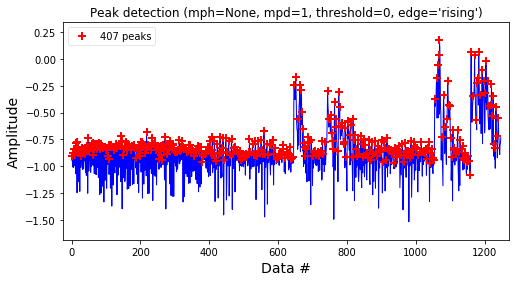

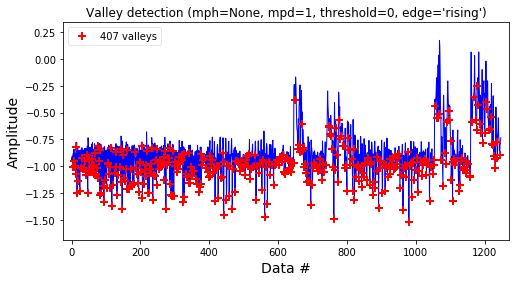

x_pca 0.22651951288070551


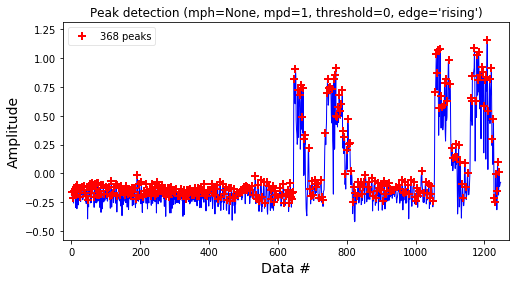

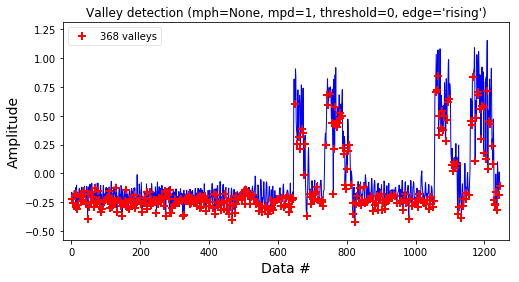

y_pca 0.14666423634220915


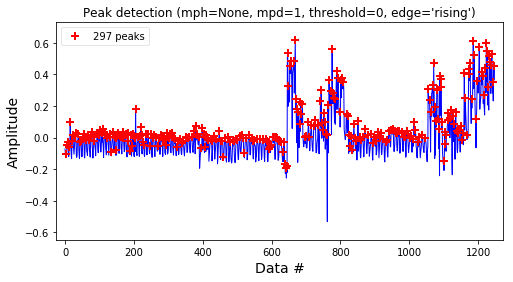

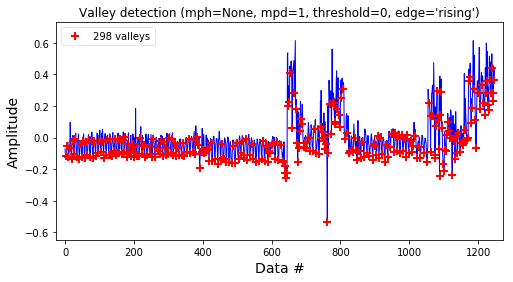

z_pca 0.11599854379944942
3001


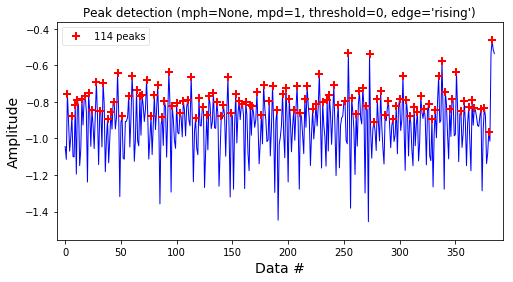

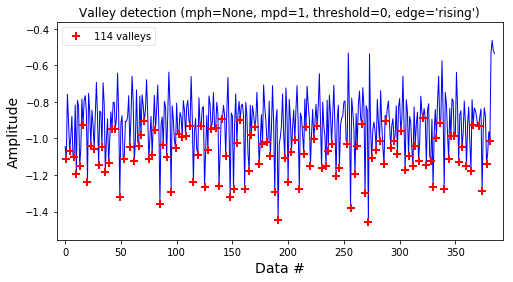

x_pca 0.3111899871580203


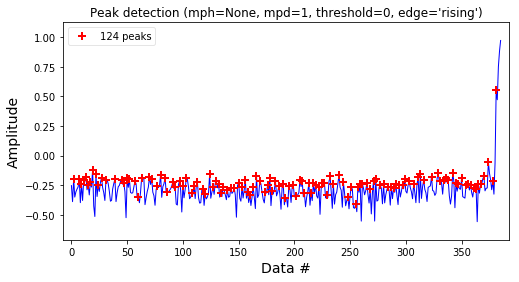

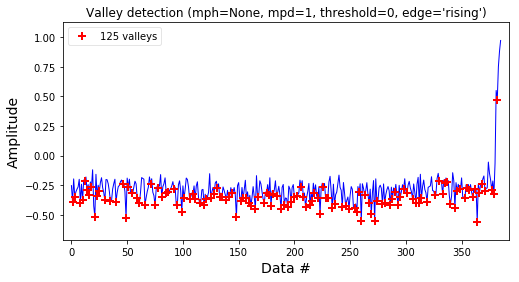

y_pca 0.1354494629446035


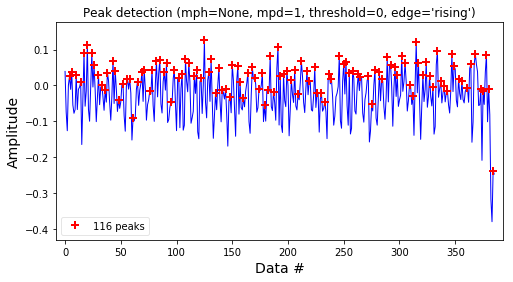

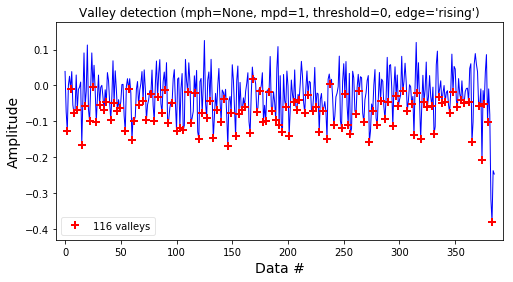

z_pca 0.10794444917943041
3002


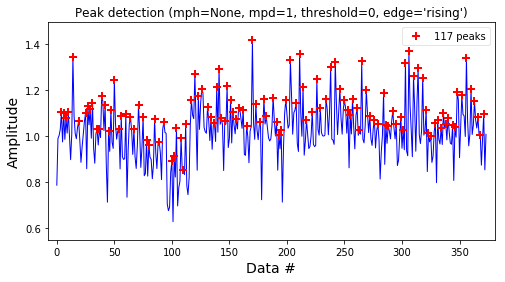

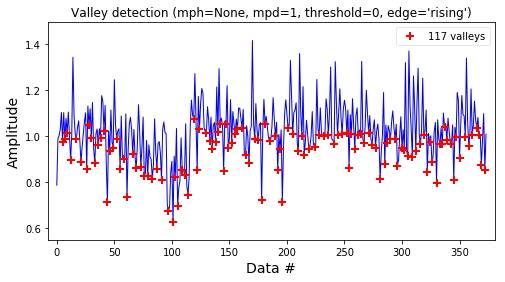

x_pca 0.18949080809129593


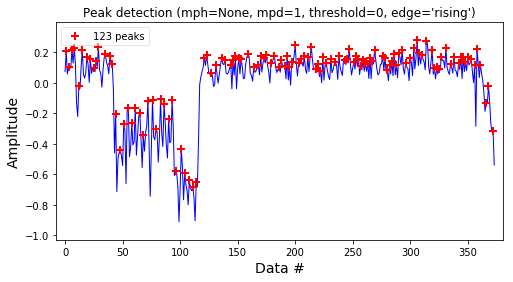

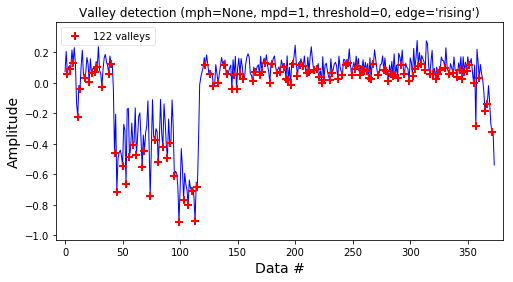

y_pca 0.14051979527649752


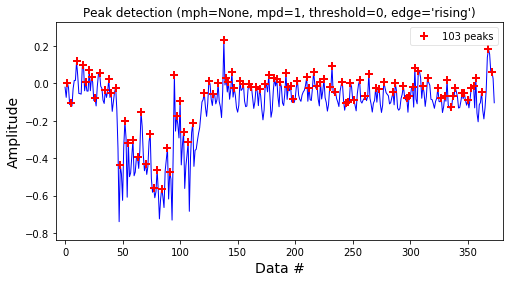

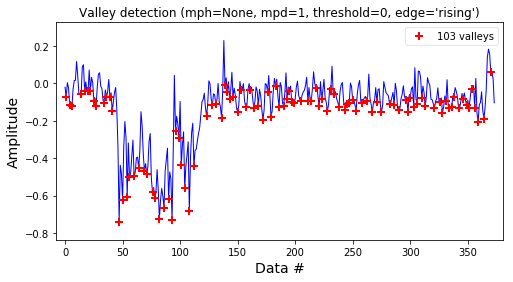

z_pca 0.12835630428020098
3003


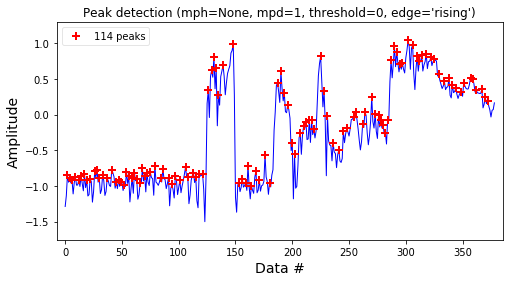

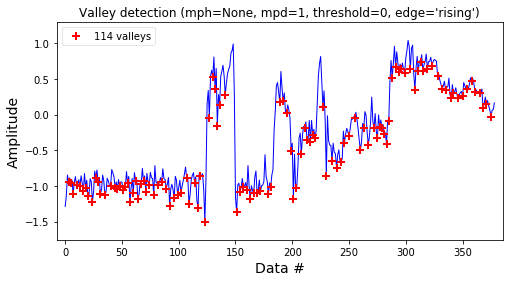

x_pca 0.26203768294268864


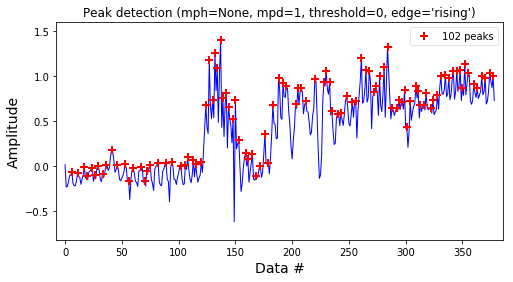

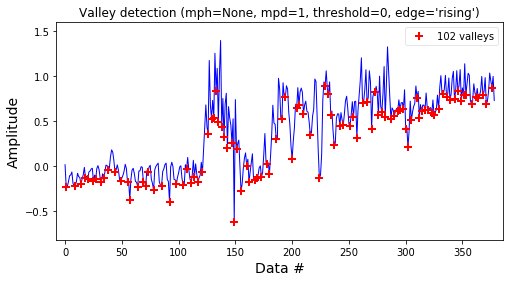

y_pca 0.28437831647167144


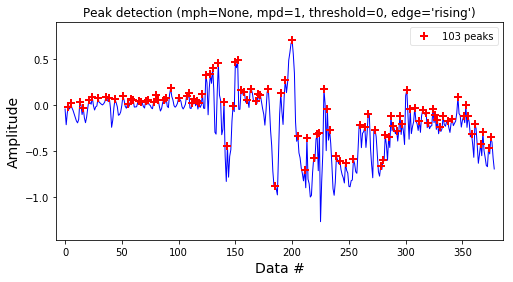

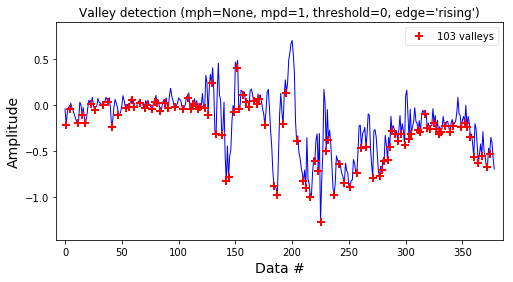

z_pca 0.2209686079230343
3004


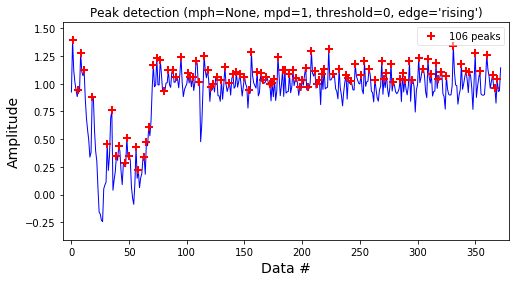

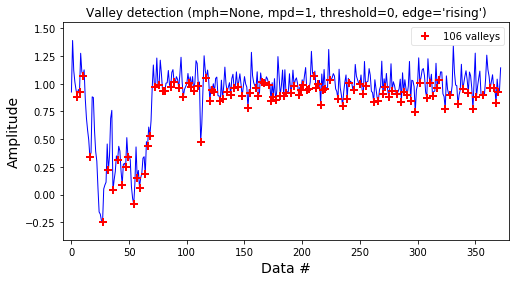

x_pca 0.20931577820650807


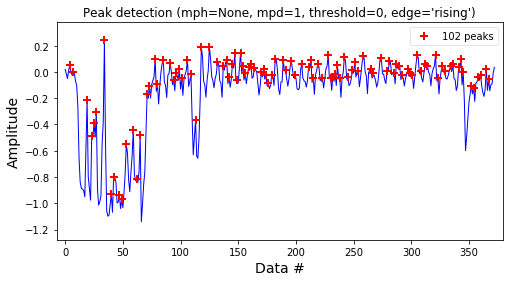

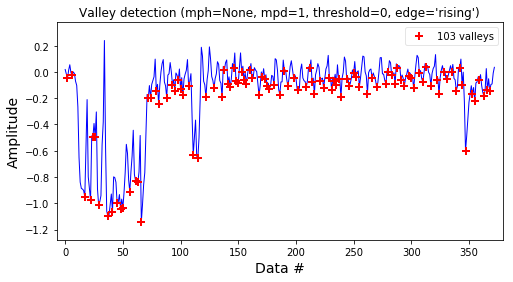

y_pca 0.16795172265516214


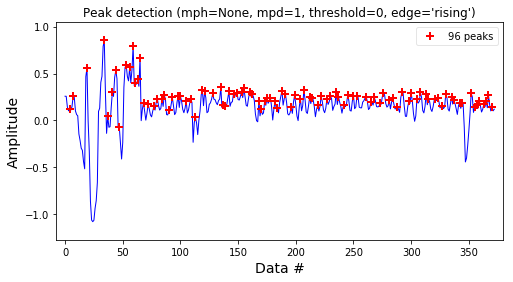

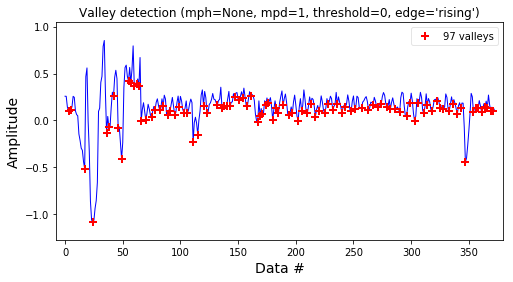

z_pca 0.17402804396487484
3005


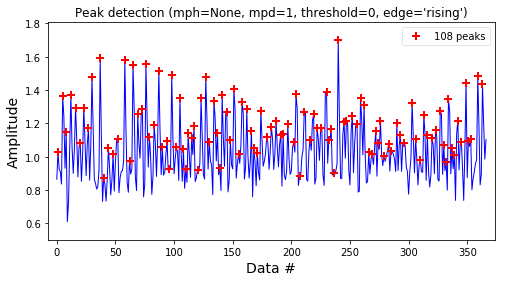

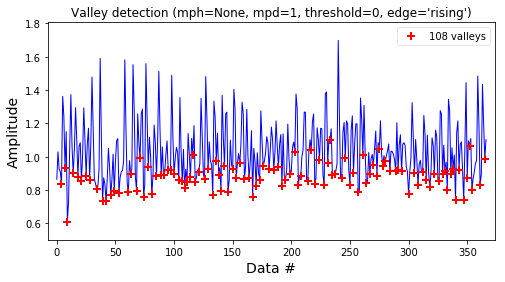

x_pca 0.3123384989039378


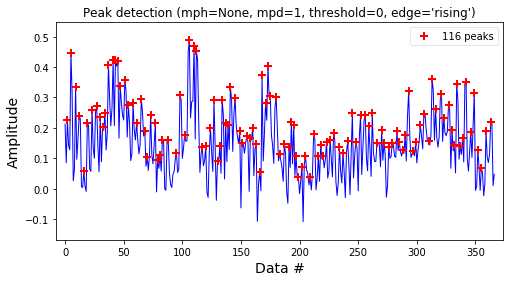

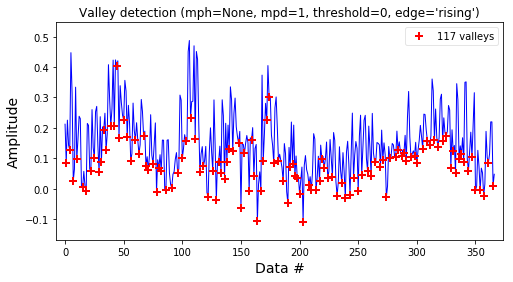

y_pca 0.1379505810685615


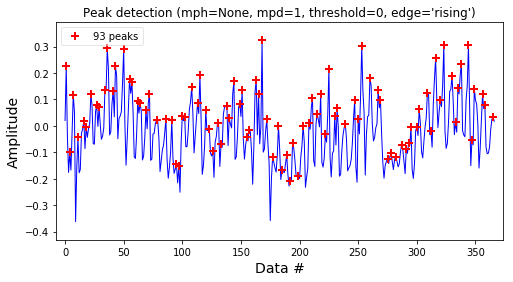

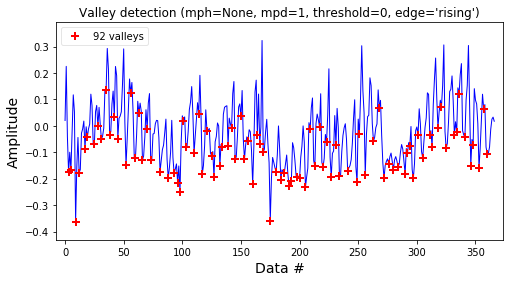

z_pca 0.16196958192528235


In [40]:
cols = ['x_pca', 'y_pca', 'z_pca']
all_avg_diff = [[],[],[]]

for subj_i in all_patients:
    df_walk_i = df_walk[df_walk['id']==subj_i]
    df_walk_i = df_walk_i.reset_index(drop=True)
    
    print(subj_i)
    
    for i in range(len(cols)):
        c = cols[i]
        
        peak_idx = detect_peaks(df_walk_i[c], show=True)    
        valley_idx = detect_peaks(df_walk_i[c], valley=True, show=True)

        peak_point = [df_walk_i.loc[i, c] for i in peak_idx]    
        valley_point = [df_walk_i.loc[i, c] for i in valley_idx]

        min_length = min(len(peak_idx), len(valley_idx))

        diff_peak_valley = [np.abs(peak_point[i] - valley_point[i]) for i in range(min_length)]
        avg_diff_pv = np.mean(diff_peak_valley)

#         print(diff_peak_valley)
        print(c, avg_diff_pv)
        
        all_avg_diff[i].append(avg_diff_pv)
        
all_avg_diff = np.array(all_avg_diff)

2001


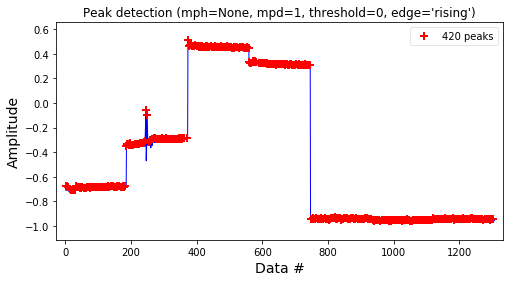

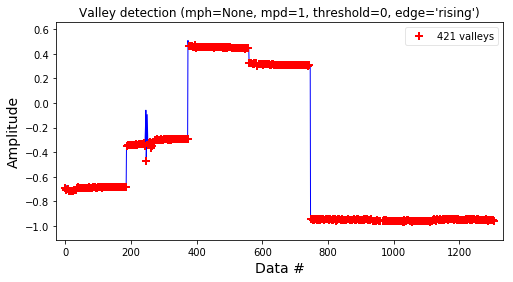

x_pca 0.010504655470915657


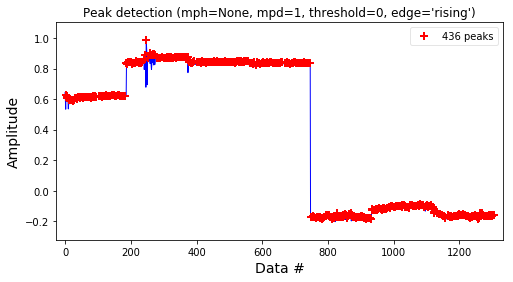

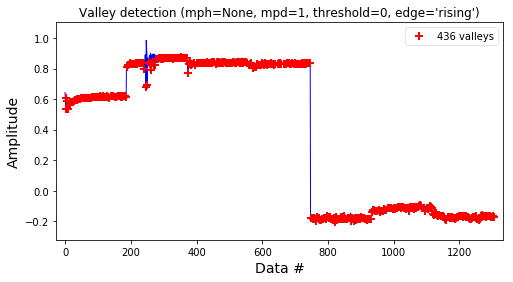

y_pca 0.011429880929896328


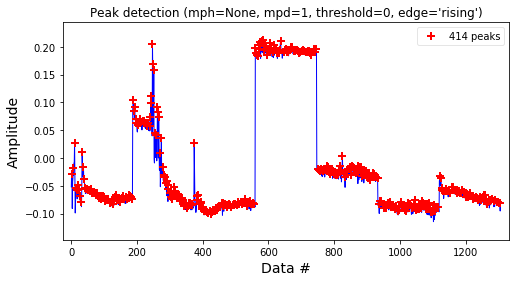

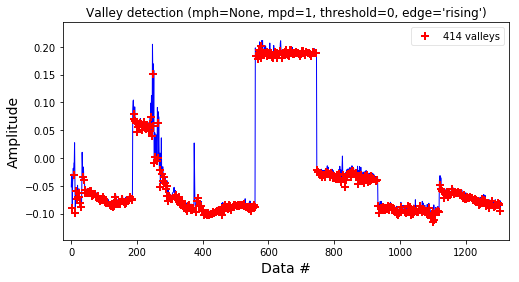

z_pca 0.011124167689429323
3001


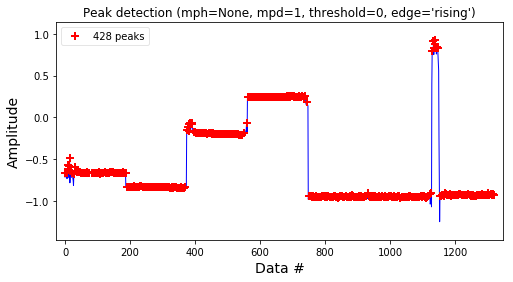

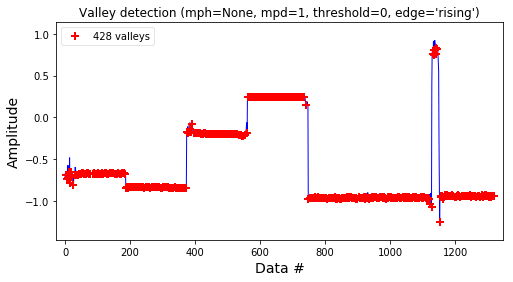

x_pca 0.02161138119863204


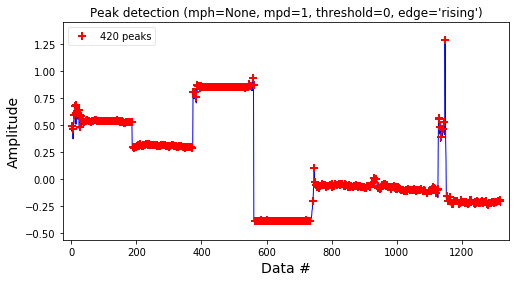

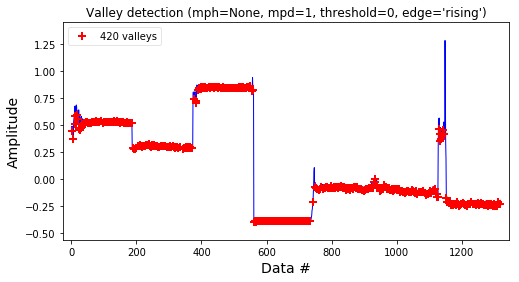

y_pca 0.022398977108531413


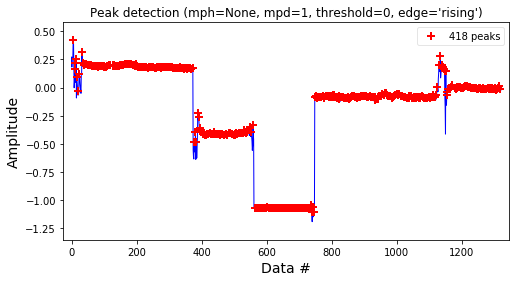

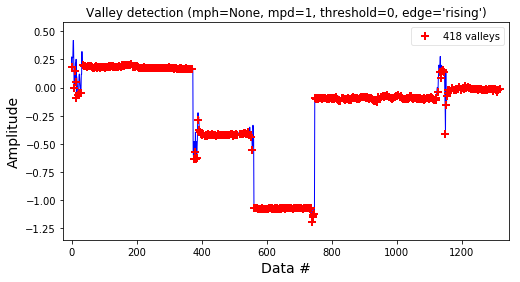

z_pca 0.02120428813906454
3002


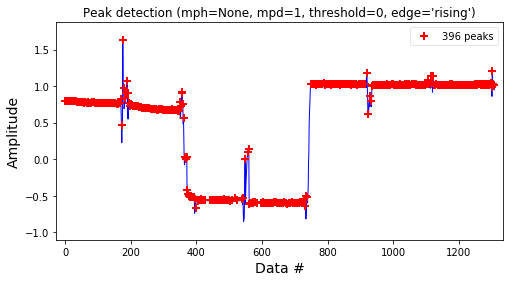

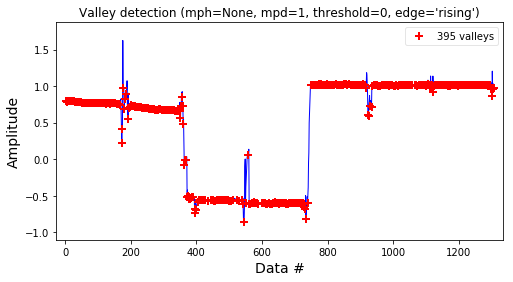

x_pca 0.0286315157976632


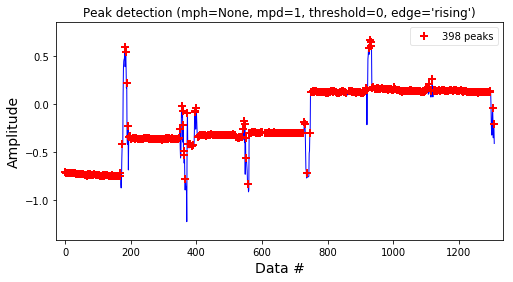

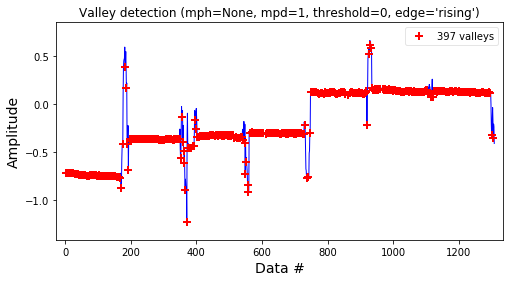

y_pca 0.028033433677914072


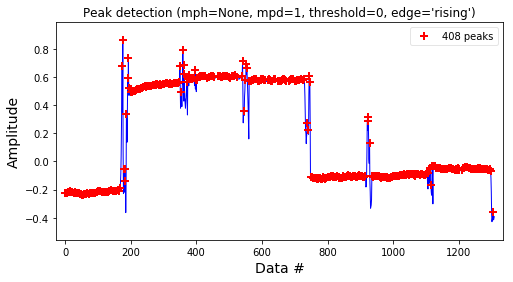

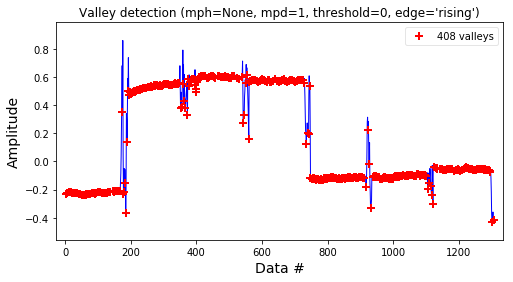

z_pca 0.02625210385320224
3003


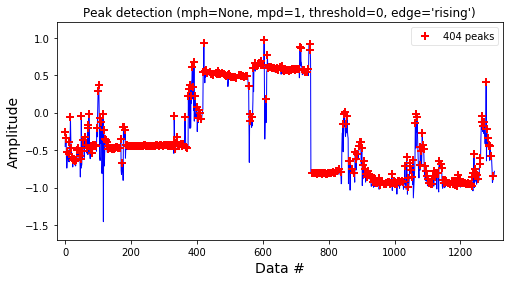

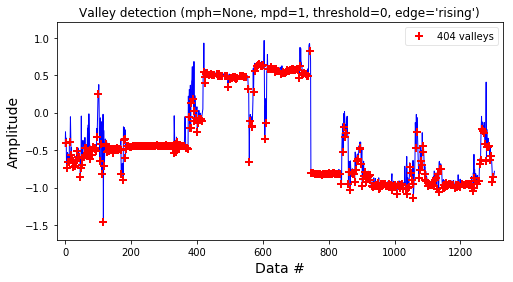

x_pca 0.10828893517131939


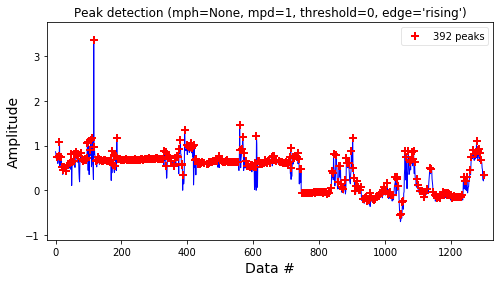

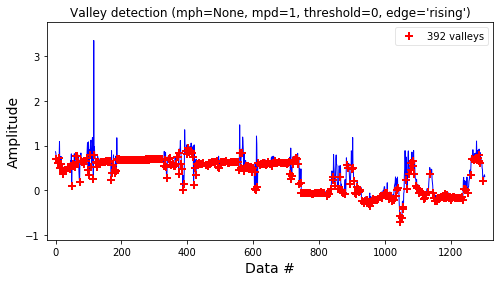

y_pca 0.1319992082722754


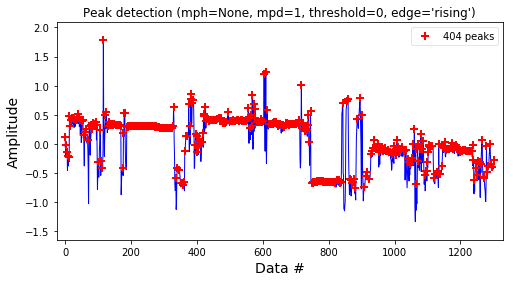

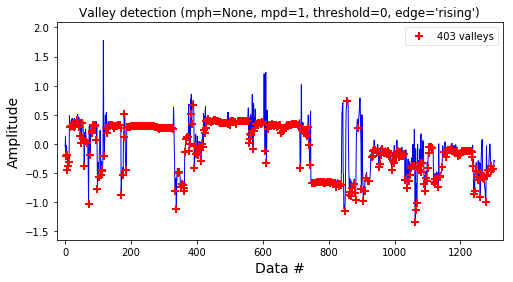

z_pca 0.1594151063108001
3004


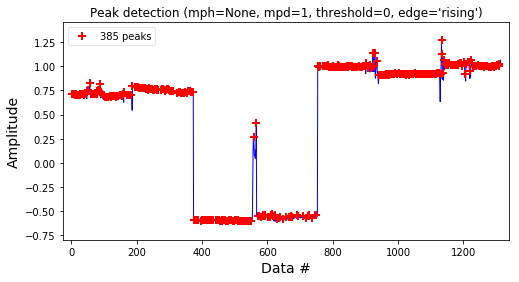

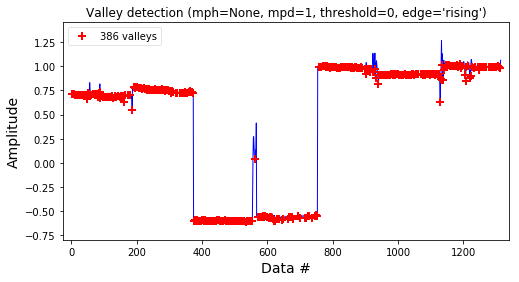

x_pca 0.022226923758818115


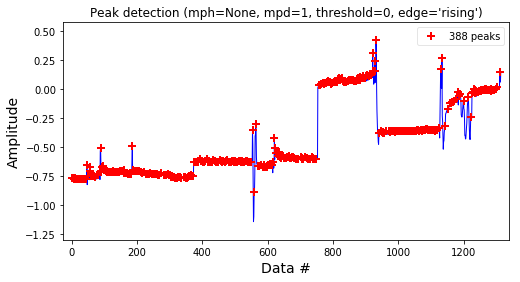

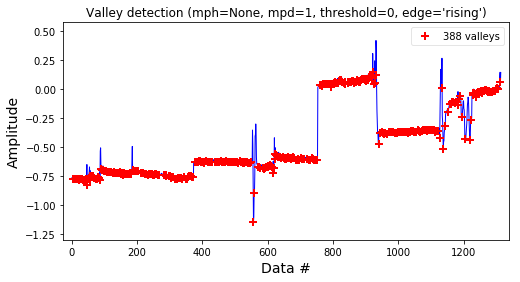

y_pca 0.023591383295370874


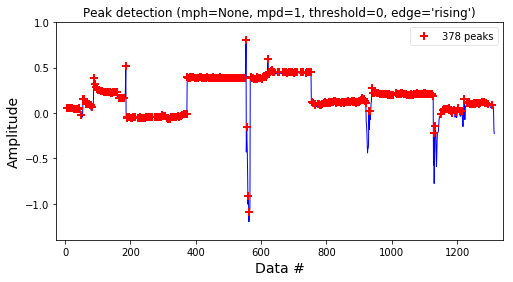

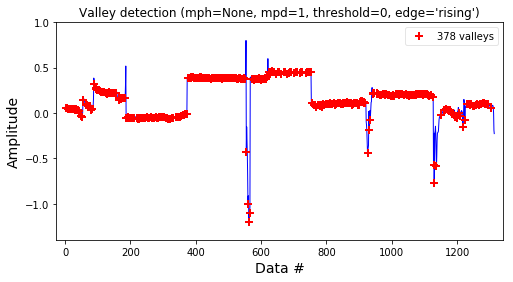

z_pca 0.026629715331687946
3005


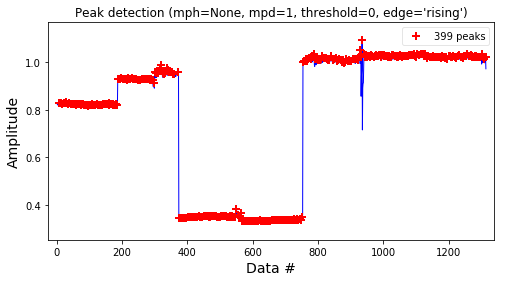

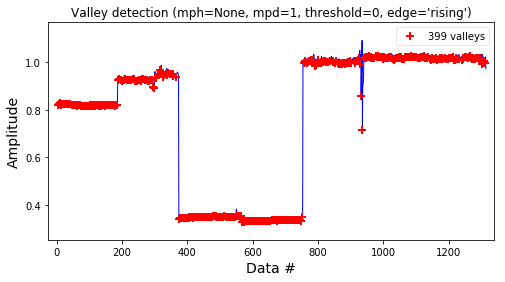

x_pca 0.009245672550094803


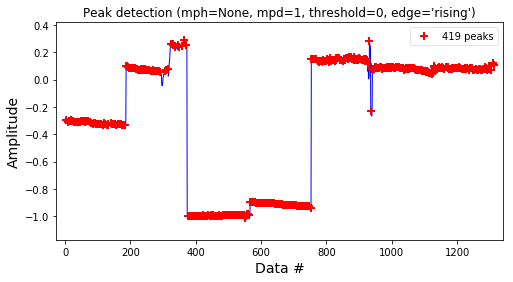

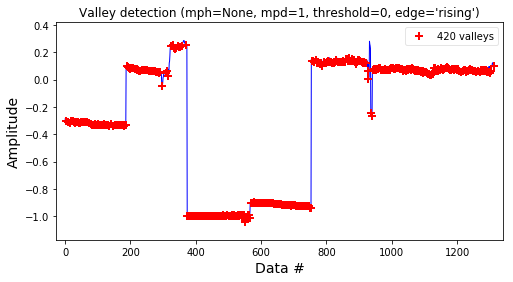

y_pca 0.017298180438181206


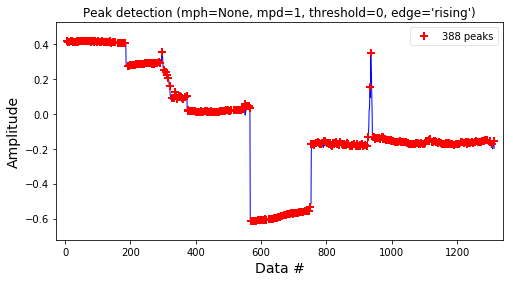

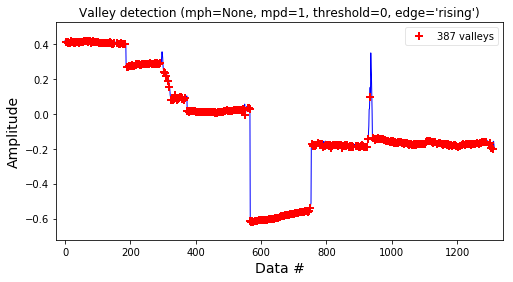

z_pca 0.006793673230643353


In [41]:
cols = ['x_pca', 'y_pca', 'z_pca']
all_avg_diff_nw = [[],[],[]]

for subj_i in all_patients:
    df_nonwalk_i = df_nonwalk[df_nonwalk['id']==subj_i]
    df_nonwalk_i = df_nonwalk_i.reset_index(drop=True)
    
    print(subj_i)
    
    for i in range(len(cols)):
        c = cols[i]
        
        peak_idx = detect_peaks(df_nonwalk_i[c], show=True)    
        valley_idx = detect_peaks(df_nonwalk_i[c], valley=True, show=True)

        peak_point = [df_nonwalk_i.loc[i, c] for i in peak_idx]    
        valley_point = [df_nonwalk_i.loc[i, c] for i in valley_idx]

        min_length = min(len(peak_idx), len(valley_idx)) - 1

        diff_peak_valley = [np.abs(peak_point[i] - valley_point[i]) for i in range(min_length)]
        avg_diff_pv = np.mean(diff_peak_valley)

    #     print(diff_peak_valley)
        print(c, avg_diff_pv)
        
        all_avg_diff_nw[i].append(avg_diff_pv)
        
all_avg_diff_nw = np.array(all_avg_diff_nw)

In [42]:
aad_t = all_avg_diff.transpose()

print('walking for patients')
for i in range(len(aad_t)):
    print(all_patients[i], aad_t[i])
    
aad_nw_t = all_avg_diff_nw.transpose()

print()
print('non-walking for patients')
for i in range(len(aad_nw_t)):
    print(all_patients[i], aad_nw_t[i])

walking for patients
2001 [0.22651951 0.14666424 0.11599854]
3001 [0.31118999 0.13544946 0.10794445]
3002 [0.18949081 0.1405198  0.1283563 ]
3003 [0.26203768 0.28437832 0.22096861]
3004 [0.20931578 0.16795172 0.17402804]
3005 [0.3123385  0.13795058 0.16196958]

non-walking for patients
2001 [0.01050466 0.01142988 0.01112417]
3001 [0.02161138 0.02239898 0.02120429]
3002 [0.02863152 0.02803343 0.0262521 ]
3003 [0.10828894 0.13199921 0.15941511]
3004 [0.02222692 0.02359138 0.02662972]
3005 [0.00924567 0.01729818 0.00679367]


In [43]:
three_sec = 20   # 3 sec/0.16 sec = 18.75 time point
one_sec = 6      # 1 sec/0.16 sec = 6.25 time point

cols = ['x_pca', 'y_pca', 'z_pca']
threshold = [0.15, 0.13, 0.11]

exceed_thres = [[],[],[]]

for cl in range(len(cols)):
    c = cols[cl]
    
    for i in range(0, len(df_walk)-three_sec, one_sec):
        df_walk_i = [df_walk.loc[j, c] for j in range(i,i+three_sec)]
        
        peak_idx = detect_peaks(df_walk_i)    
        valley_idx = detect_peaks(df_walk_i, valley=True)

        peak_point = [df_walk_i[j] for j in peak_idx]    
        valley_point = [df_walk_i[j] for j in valley_idx]

        min_length = min(len(peak_idx), len(valley_idx))

        diff_peak_valley = [np.abs(peak_point[i] - valley_point[i]) for i in range(min_length)]
        diff_peak_valley = np.array(diff_peak_valley)
        
        exceed = len(diff_peak_valley[diff_peak_valley>=threshold[cl]])
        exceed_thres[cl].append(exceed)

In [44]:
three_sec = 20   # 3 sec/0.16 sec = 18.75 time point
one_sec = 6      # 1 sec/0.16 sec = 6.25 time point

cols = ['x_pca', 'y_pca', 'z_pca']
threshold = [0.15, 0.13, 0.11]

exceed_thres_nw = [[],[],[]]

for cl in range(len(cols)):
    c = cols[cl]
    
    for i in range(0, len(df_nonwalk)-three_sec, one_sec):
        df_nonwalk_i = [df_nonwalk.loc[j, c] for j in range(i,i+three_sec)]
        
        peak_idx = detect_peaks(df_nonwalk_i)    
        valley_idx = detect_peaks(df_nonwalk_i, valley=True)

        peak_point = [df_nonwalk_i[j] for j in peak_idx]    
        valley_point = [df_nonwalk_i[j] for j in valley_idx]

        min_length = min(len(peak_idx), len(valley_idx))

        diff_peak_valley = [np.abs(peak_point[i] - valley_point[i]) for i in range(min_length)]
        diff_peak_valley = np.array(diff_peak_valley)
        
        exceed = len(diff_peak_valley[diff_peak_valley>=threshold[cl]])
        exceed_thres_nw[cl].append(exceed)

In [45]:
import seaborn as sns

C:\Users\fifamd\Anaconda3\envs\tf\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


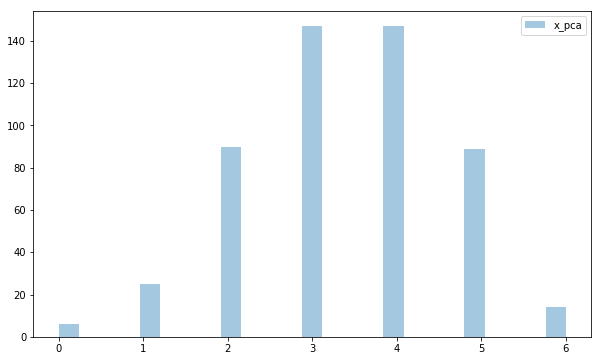

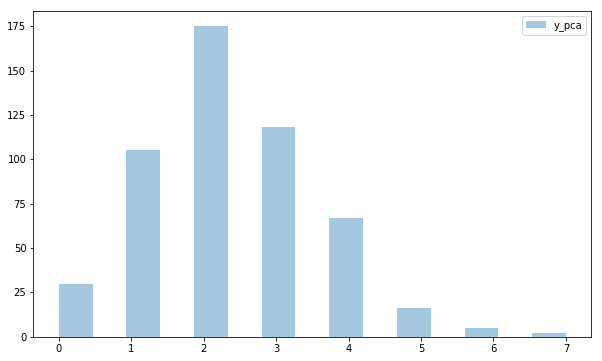

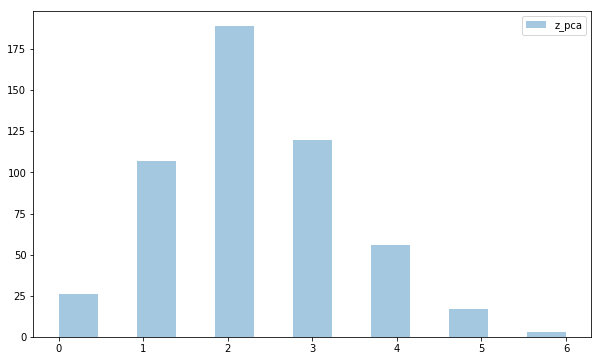

In [46]:
for i in range(3):
    f, axis = plt.subplots(figsize=(10,6))
    ax = sns.distplot(exceed_thres[i], kde=False, ax=axis, label=cols[i])
    ax.legend()

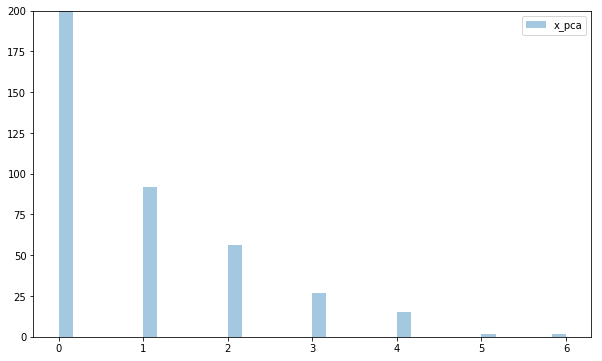

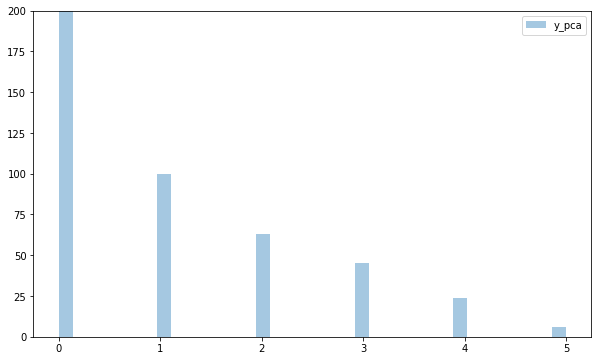

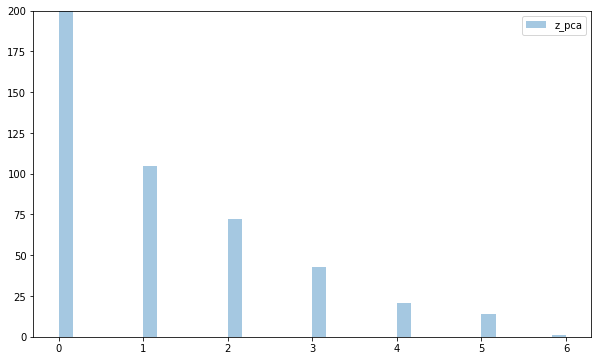

In [47]:
for i in range(3):
    f, axis = plt.subplots(figsize=(10,6))
    ax = sns.distplot(exceed_thres_nw[i], kde=False, ax=axis, label=cols[i])
    ax.legend()
    ax.set_ylim(0,200)

## Normal People

In [48]:
X_dict_1 = {
    'id': subj_all,
    'x': [X_i[0] for X_i in X_all],
    'y': [X_i[1] for X_i in X_all],
    'z': [X_i[2] for X_i in X_all],
    'x_pca': [X_i_pca[0] for X_i_pca in X_pca],
    'y_pca': [X_i_pca[1] for X_i_pca in X_pca],
    'z_pca': [X_i_pca[2] for X_i_pca in X_pca],
    'roll': [rpy_pca_i[0] for rpy_pca_i in rpy_pca],
    'pitch': [rpy_pca_i[1] for rpy_pca_i in rpy_pca],
    'yaw': [rpy_pca_i[2] for rpy_pca_i in rpy_pca],
    'label': y_all
}

df_rpy_1 = pd.DataFrame(X_dict_1)

In [49]:
df_rpy_1

id         x         y         z     x_pca     y_pca     z_pca  \
0      1001 -0.299275 -0.903567 -0.000611  0.193143 -0.585830 -0.480716   
1      1001 -0.304650 -0.905033  0.004642  0.190031 -0.588011 -0.474070   
2      1001 -0.301230 -0.901612  0.002687  0.192714 -0.584382 -0.476687   
3      1001 -0.307215 -0.926532  0.002199  0.185157 -0.608823 -0.478298   
4      1001 -0.308681 -0.922623 -0.005008  0.181395 -0.603815 -0.483788   
5      1001 -0.309658 -0.929952 -0.005008  0.179950 -0.611038 -0.484429   
6      1001 -0.314544 -0.921645 -0.008429  0.174768 -0.602223 -0.484547   
7      1001 -0.309658 -0.921645 -0.014781  0.176909 -0.601310 -0.492215   
8      1001 -0.309658 -0.927020 -0.014292  0.176695 -0.606695 -0.492511   
9      1001 -0.311124 -0.927020 -0.011849  0.176253 -0.607053 -0.489719   
10     1001 -0.311613 -0.927509 -0.006474  0.177776 -0.608366 -0.484687   
11     1001 -0.308681 -0.927509 -0.011849  0.178476 -0.607574 -0.490717   
12     1001 -0.306727 -0.921645 -0.013803  0.179985 -0.601509 -0.492438   
13     1001 -0.306238 -0.933372 -0.019667  0.177378 -0.612185 -0.499606   
14     1001 -0.313567 -0.927998 -0.023087  0.169720 -0.606227 -0.499198   
15     1001 -0.314056 -0.902590 -0.016246  0.173704 -0.582192 -0.489247   
16     1001 -0.312590 -0.928486 -0.006963  0.176617 -0.609239 -0.484897   
17     1001 -0.316010 -0.917737 -0.015269  0.171143 -0.597273 -0.489702   
18     1001 -0.311124 -0.931418 -0.023576  0.171543 -0.609567 -0.501048   
19     1001 -0.323828 -0.922623 -0.003542  0.167940 -0.603803 -0.476679   
20     1001 -0.306727 -0.927998 -0.013315  0.179698 -0.607859 -0.492869   
21     1001 -0.316010 -0.927998 -0.007451  0.173309 -0.608626 -0.483973   
22     1001 -0.309170 -0.931418 -0.019178  0.174994 -0.610284 -0.497772   
23     1001 -0.311613 -0.922134  0.004153  0.182147 -0.604714 -0.474228   
24     1001 -0.302329 -0.927509 -0.015269  0.183069 -0.607142 -0.496264   
25     1001 -0.308681 -0.925554 -0.015269  0.177341 -0.605111 -0.493574   
26     1001 -0.311613 -0.923600 -0.019667  0.173131 -0.602448 -0.496208   
27     1001 -0.311613 -0.917737 -0.009894  0.177219 -0.598181 -0.486463   
28     1001 -0.307215 -0.924577 -0.025041  0.175114 -0.602645 -0.502932   
29     1001 -0.312590 -0.921645  0.001222  0.180183 -0.603759 -0.476469   
...     ...       ...       ...       ...       ...       ...       ...   
26686  2002 -0.479573 -0.274478  0.612598  0.302268 -0.057263  0.235520   
26687  2002 -0.407747  0.020522  0.802668  0.461551  0.203315  0.422705   
26688  2002 -0.486414 -0.043853  0.776283  0.374200  0.145099  0.419647   
26689  2002 -0.595374 -0.126917  0.793873  0.273906  0.062049  0.465748   
26690  2002 -0.669644 -0.149393  0.769443  0.194448  0.044839  0.468593   
26691  2002 -0.776161 -0.328714  0.851041  0.113236 -0.143297  0.558979   
26692  2002 -0.821602 -0.288159  0.484093 -0.063003 -0.045308  0.246412   
26693  2002 -0.802546 -0.762602  0.726933  0.010367 -0.552054  0.395597   
26694  2002 -0.449768 -0.274967  0.700548  0.362677 -0.071932  0.304508   
26695  2002 -0.478596 -0.230503  0.893550  0.411488 -0.057653  0.498084   
26696  2002 -0.321751  0.176878  0.693219  0.511678  0.373439  0.311499   
26697  2002 -0.811830 -0.290114  0.775795  0.054974 -0.092875  0.509106   
26698  2002 -0.663292 -0.173335  0.707389  0.175345  0.030767  0.406133   
26699  2002 -0.708733 -0.093691  0.655107  0.119669  0.118300  0.386649   
26700  2002 -0.799614 -0.129849  0.702503  0.050702  0.076643  0.459597   
26701  2002 -0.848842 -0.257377  0.745989  0.012029 -0.055308  0.500478   
26702  2002 -0.982722 -0.136201  0.352656 -0.249880  0.127824  0.208614   
26703  2002 -0.733163 -0.373666  0.655596  0.076576 -0.157903  0.357706   
26704  2002 -0.594397 -0.191414  0.493377  0.157668  0.045187  0.181735   
26705  2002 -0.956337 -0.369269  0.520250 -0.180037 -0.128914  0.319574   
26706  2002 -0.594397 -0.281319  0.712275  0.232885 -0.077737  0.369436   
26707  2002 -0.844933 -0.089294  0

In [50]:
df_walk_1 = df_rpy_1[df_rpy_1['label']==label_dict['walk']]
df_walk_1 = df_walk_1.reset_index(drop=True)

In [51]:
df_nonwalk_1 = df_rpy_1[df_rpy_1['label']!=label_dict['walk']]
df_nonwalk_1 = df_nonwalk_1.reset_index(drop=True)

1001


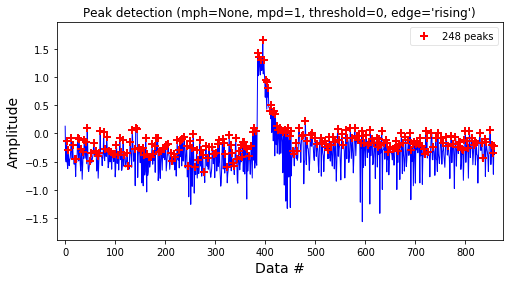

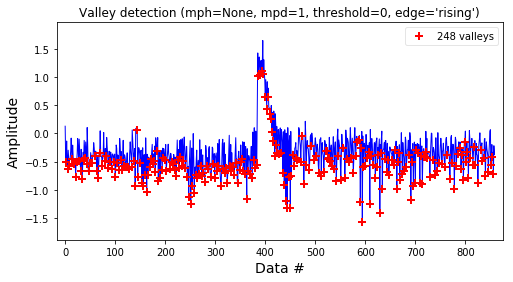

x_pca 0.43535274457436823


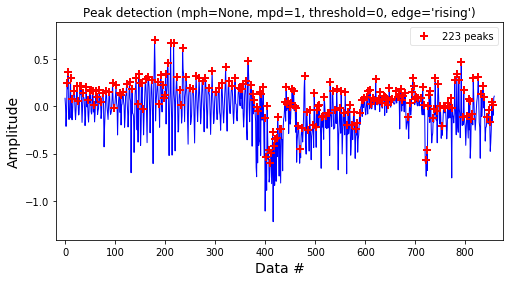

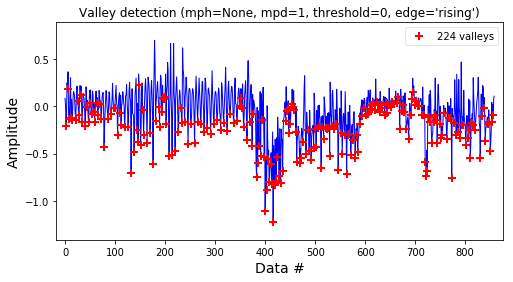

y_pca 0.33382822642344584


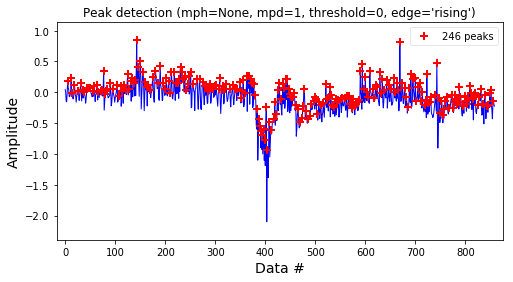

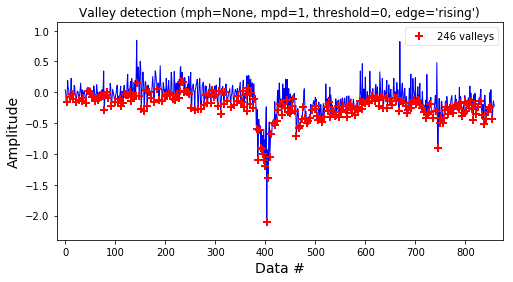

z_pca 0.2532050973288983
1002


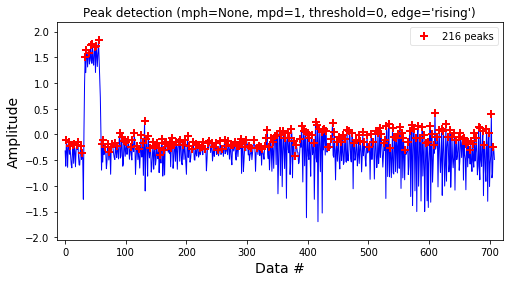

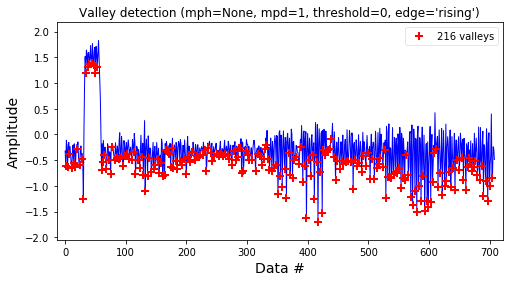

x_pca 0.5696216748005499


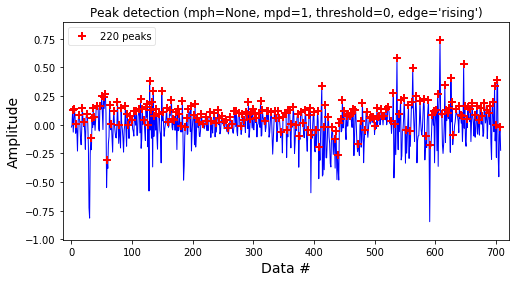

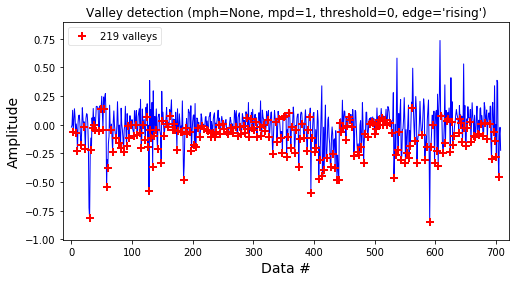

y_pca 0.228838581539096


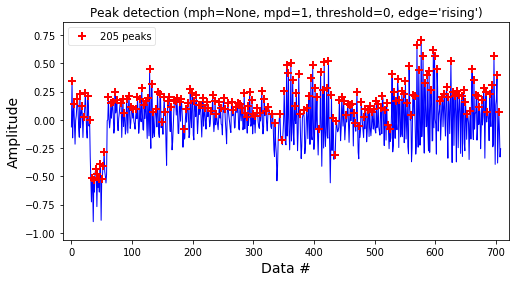

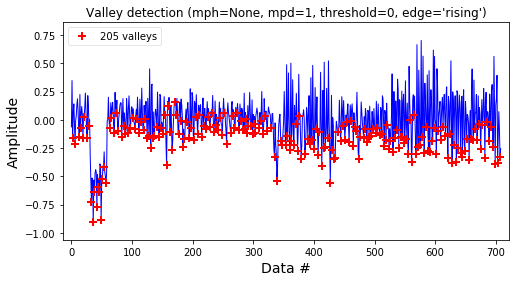

z_pca 0.3362657477297349
1003


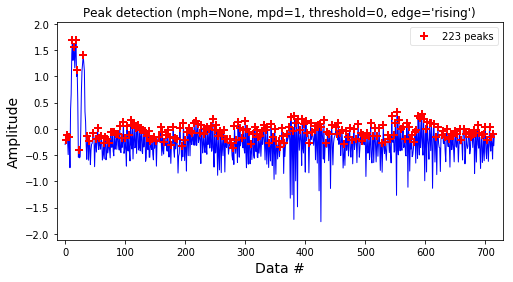

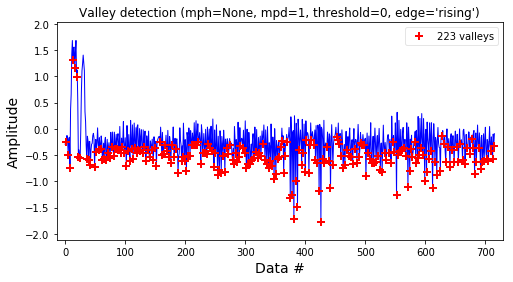

x_pca 0.5163893690569911


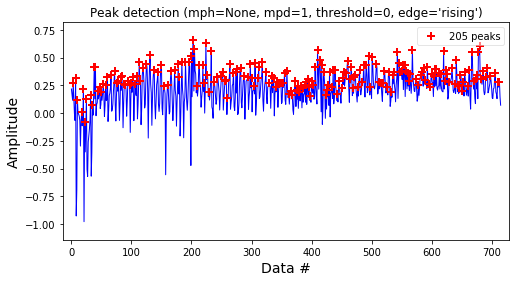

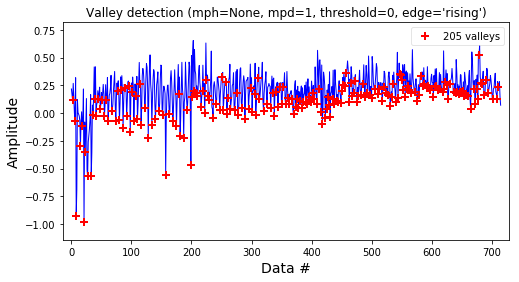

y_pca 0.23756564399192978


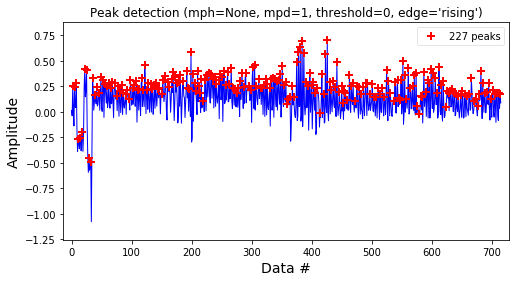

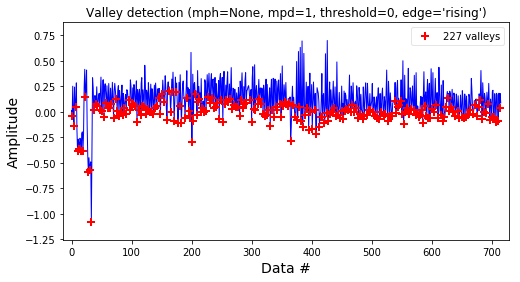

z_pca 0.2708907863559872
1004


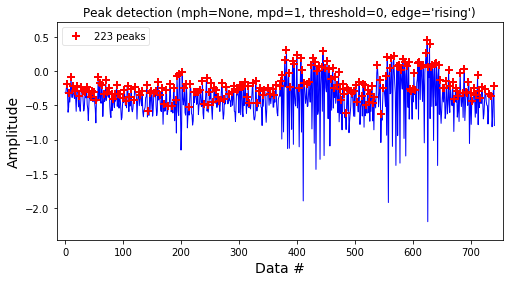

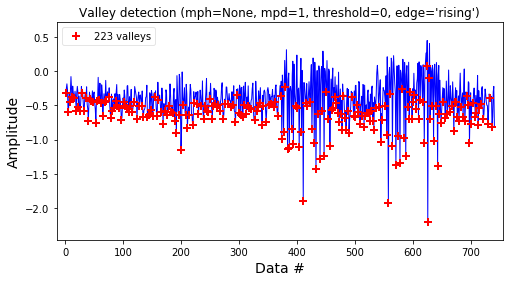

x_pca 0.45507040515172503


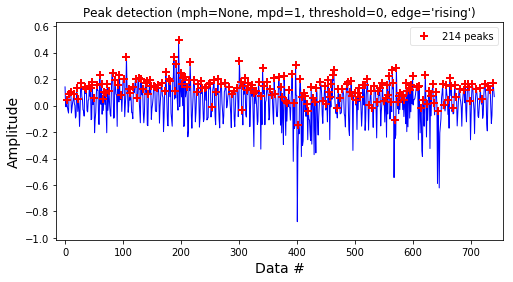

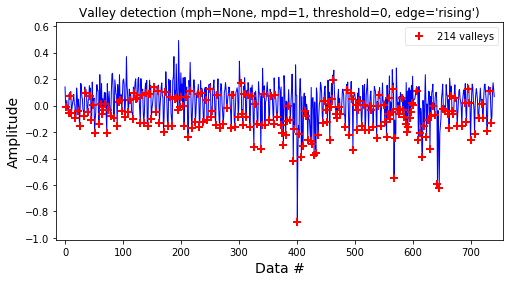

y_pca 0.21662266846378656


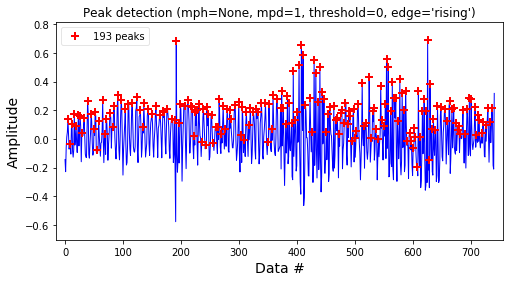

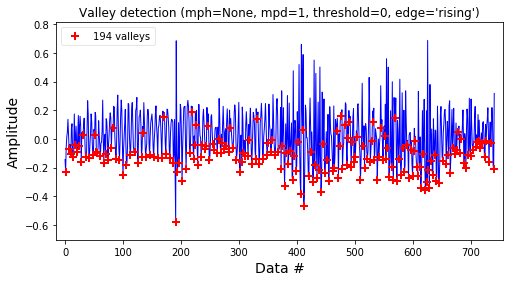

z_pca 0.31097511357405005
1005


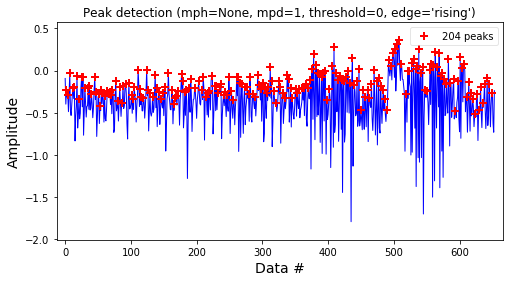

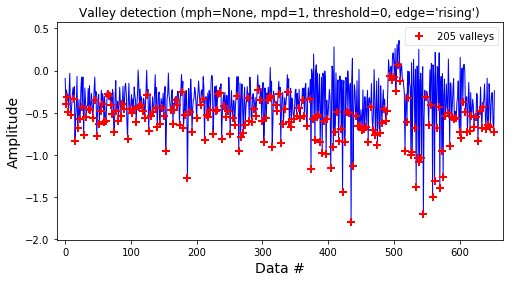

x_pca 0.4633253859565535


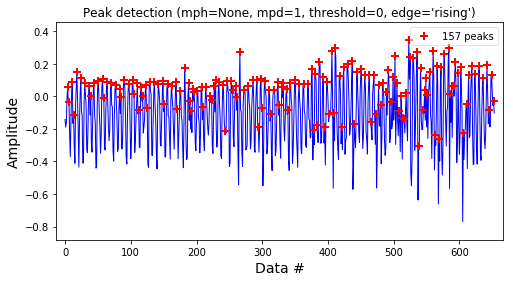

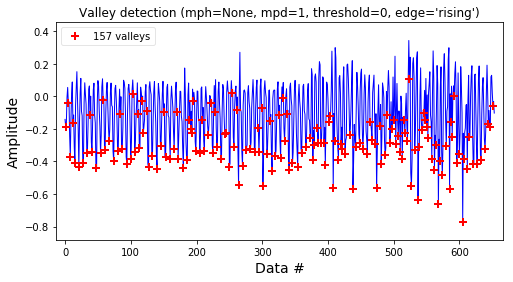

y_pca 0.3475871998379979


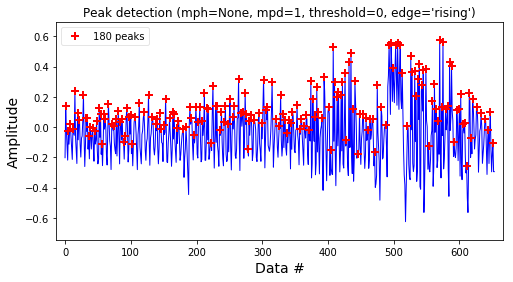

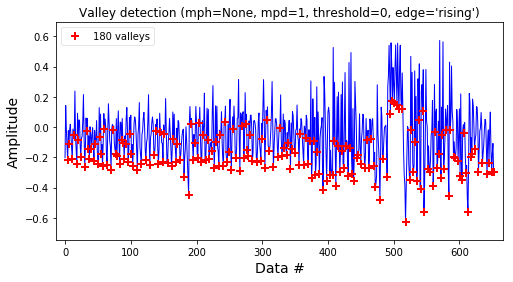

z_pca 0.3147898101043069
1006


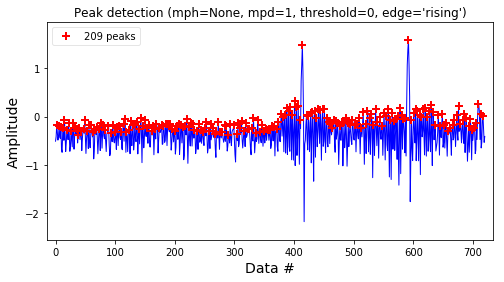

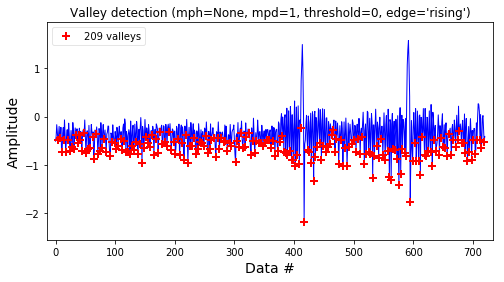

x_pca 0.5735263365598364


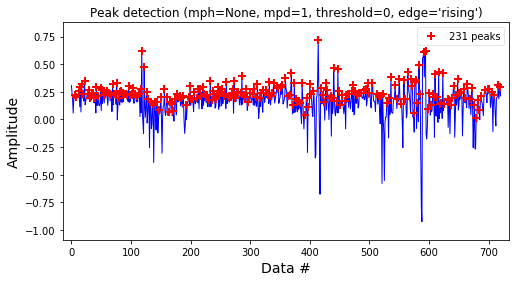

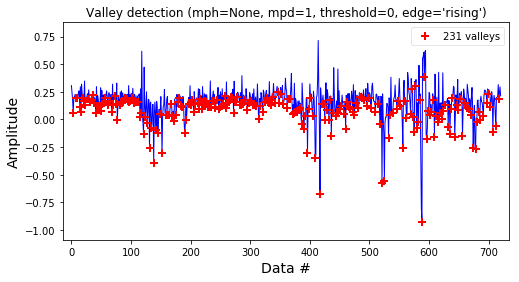

y_pca 0.17633801367012467


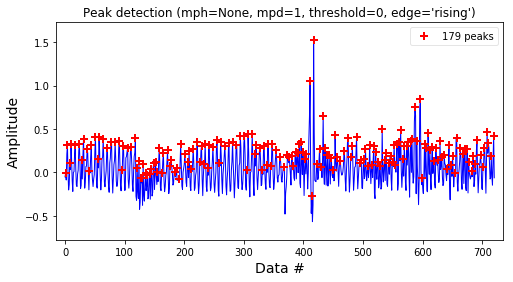

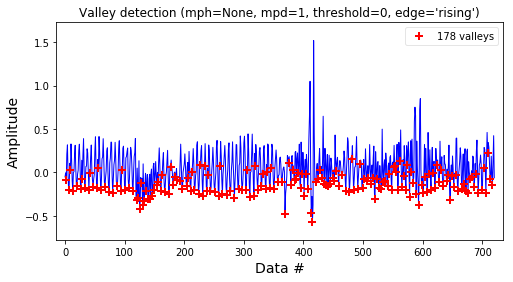

z_pca 0.37150617250374773
1007


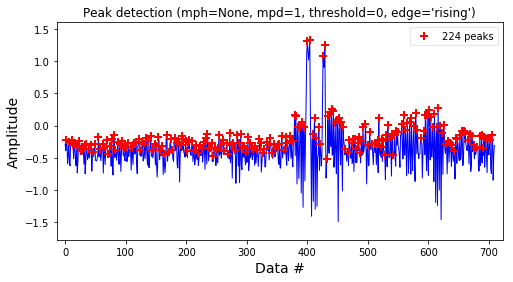

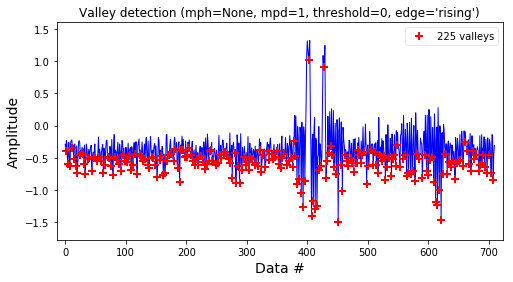

x_pca 0.41178152449538824


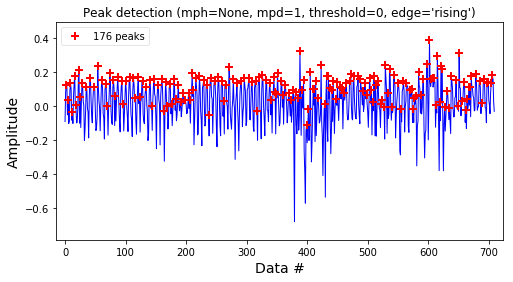

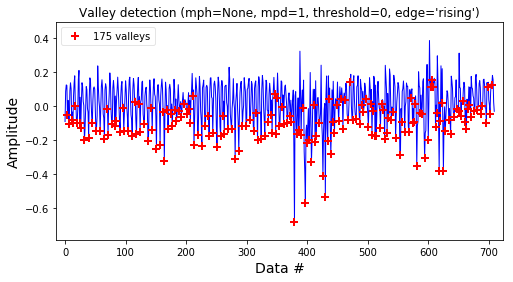

y_pca 0.22502543153918086


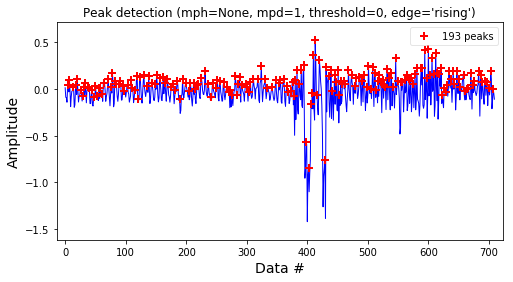

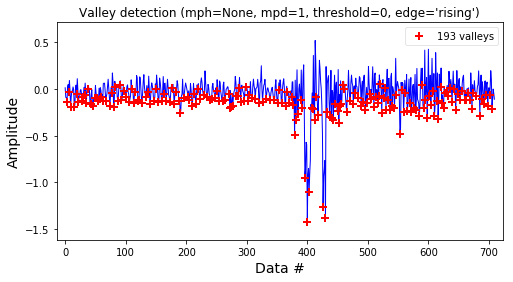

z_pca 0.23202884965458237
1008


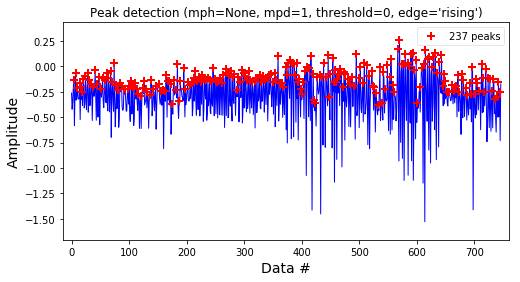

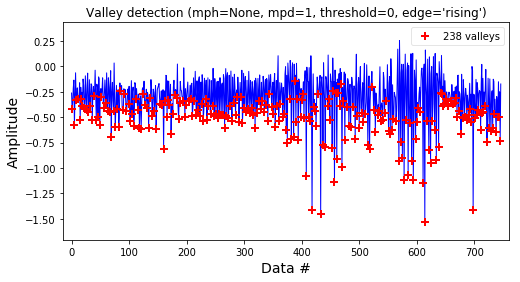

x_pca 0.40158583769138567


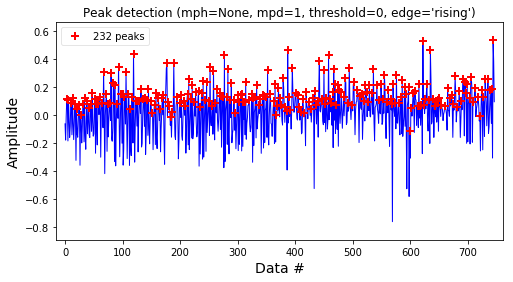

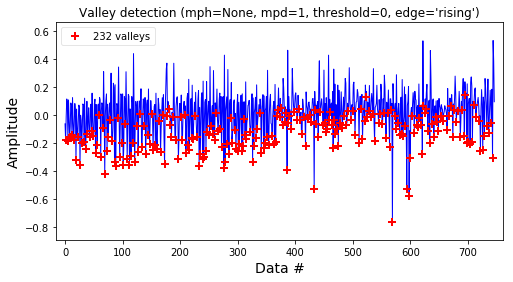

y_pca 0.2884811031861522


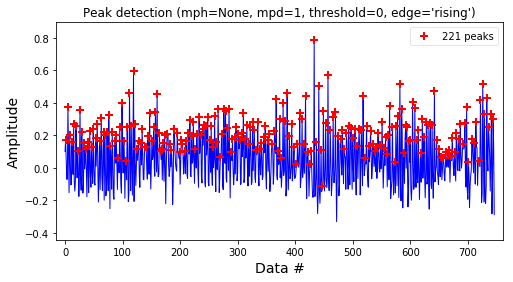

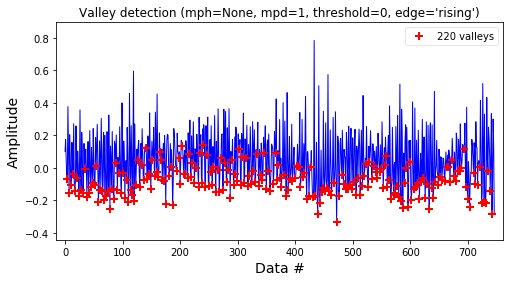

z_pca 0.3070407717091633
1009


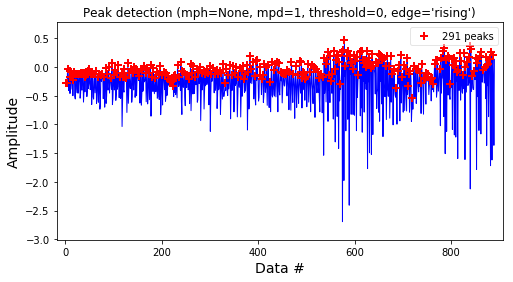

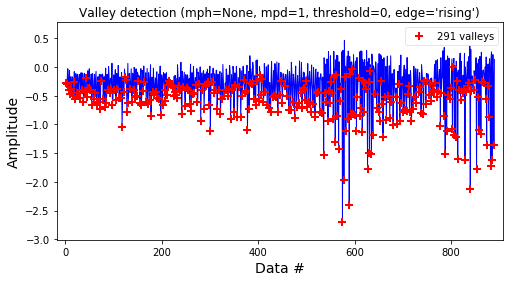

x_pca 0.5986200877950425


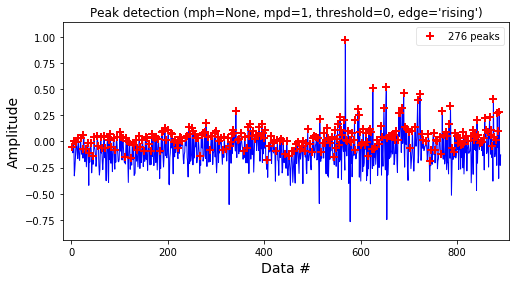

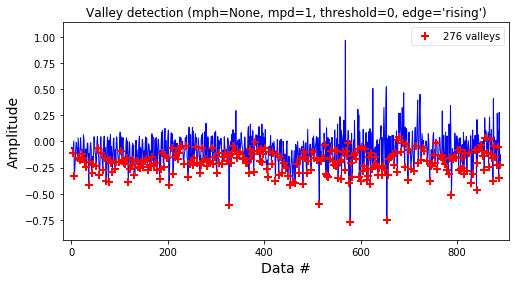

y_pca 0.25254944385126726


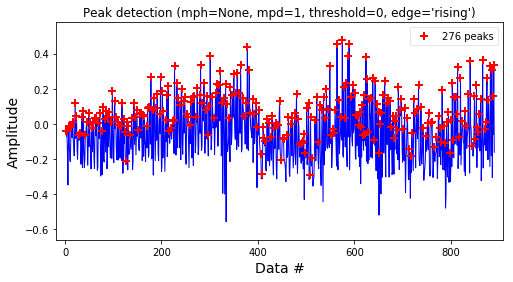

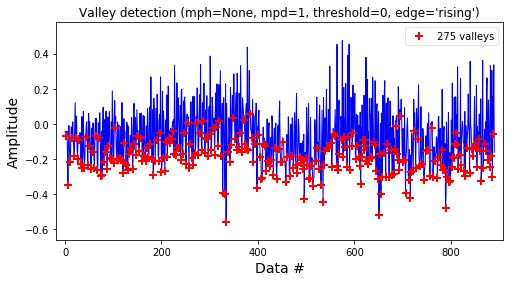

z_pca 0.2639506544110362
1010


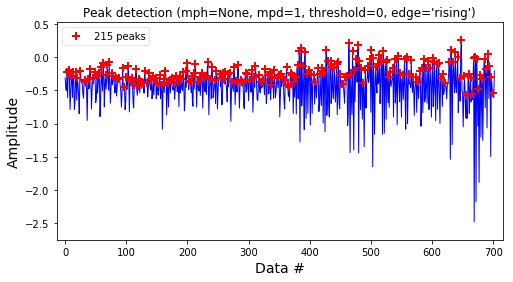

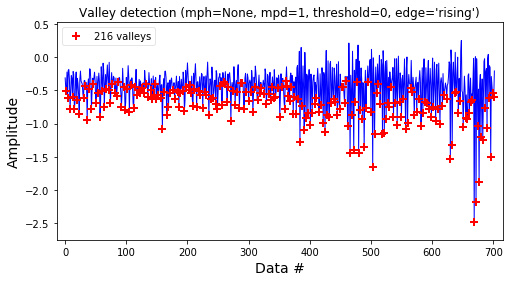

x_pca 0.5168430982050339


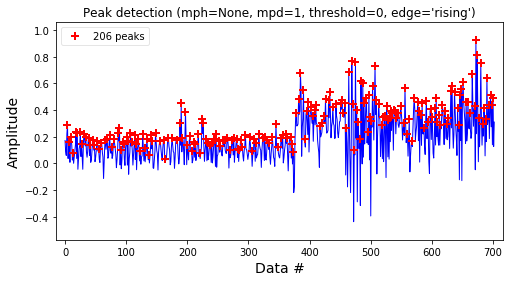

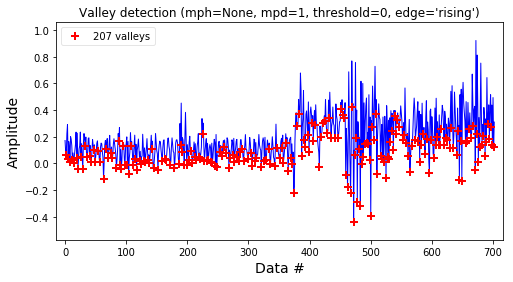

y_pca 0.23069574281001257


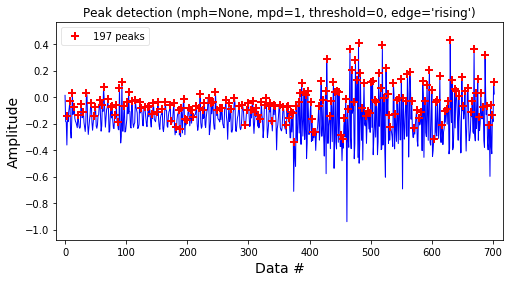

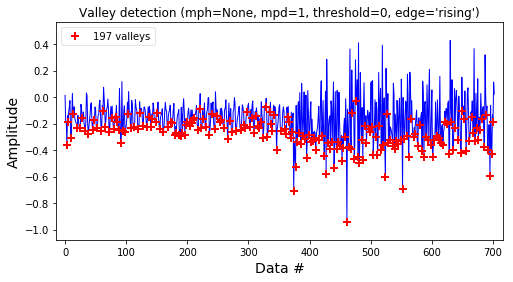

z_pca 0.25570728987137803
1011


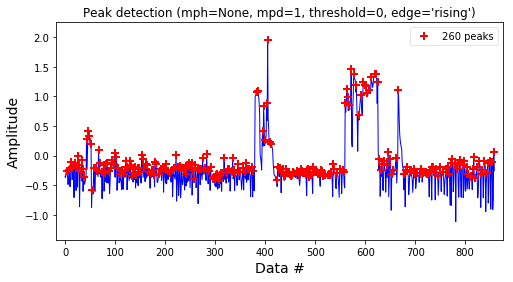

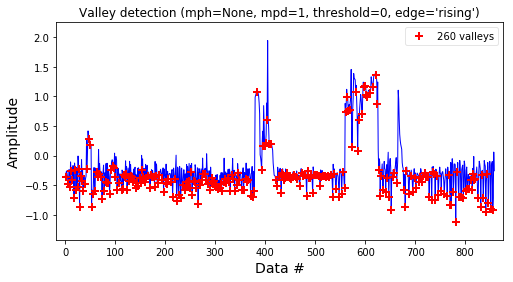

x_pca 0.28182244174875093


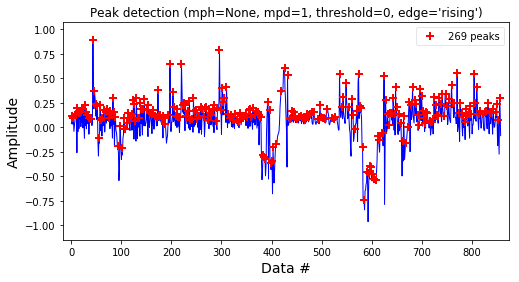

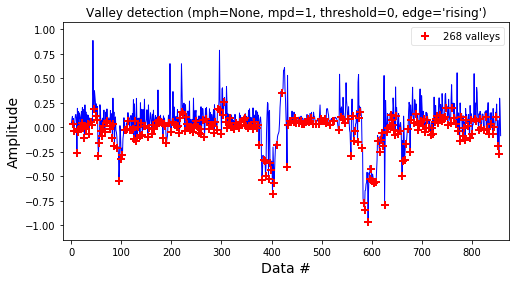

y_pca 0.18722611932259775


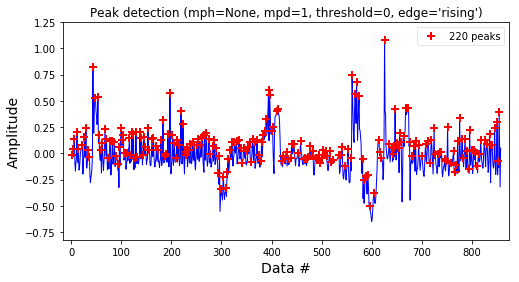

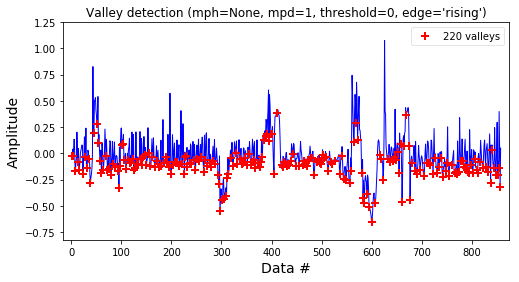

z_pca 0.19786473652520575
1012


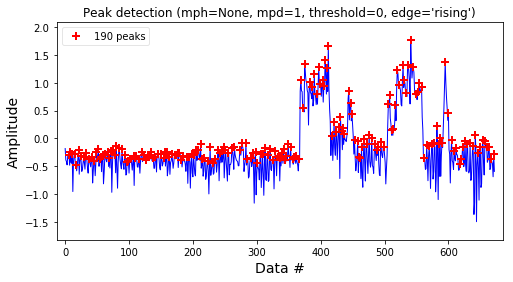

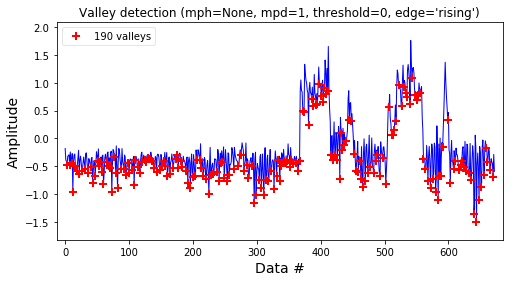

x_pca 0.38675789910985986


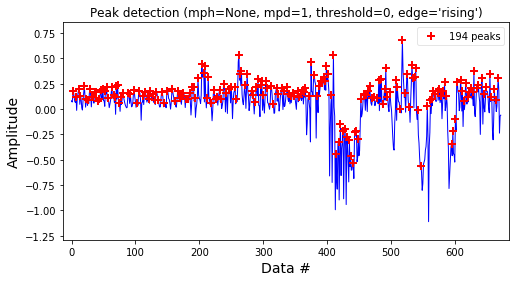

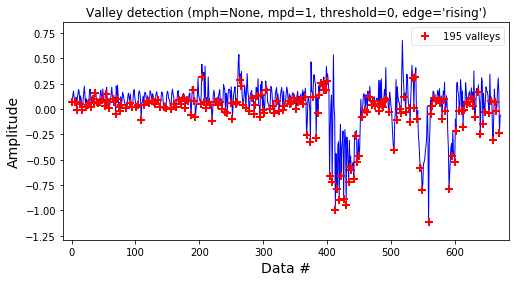

y_pca 0.19929658166104677


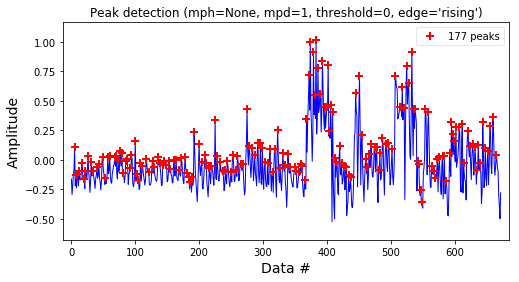

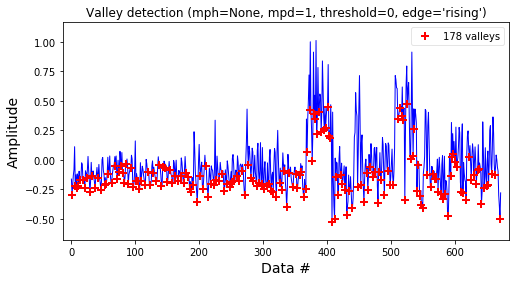

z_pca 0.25359680422244074
2002


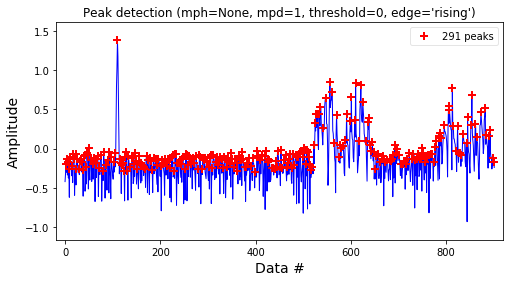

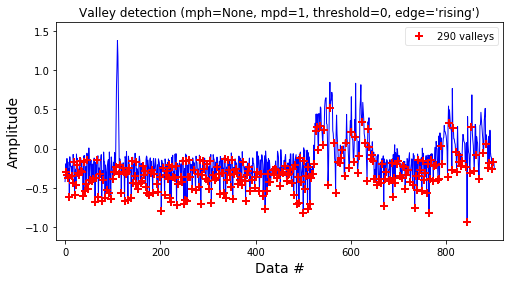

x_pca 0.2837293562042874


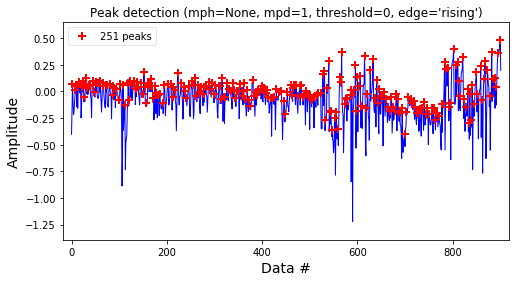

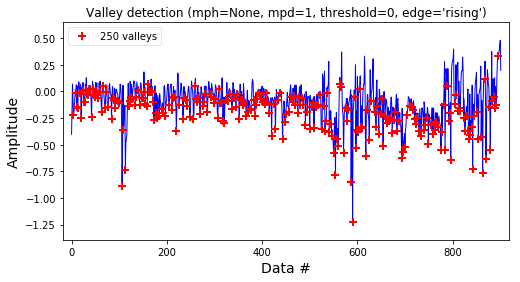

y_pca 0.2104035603608562


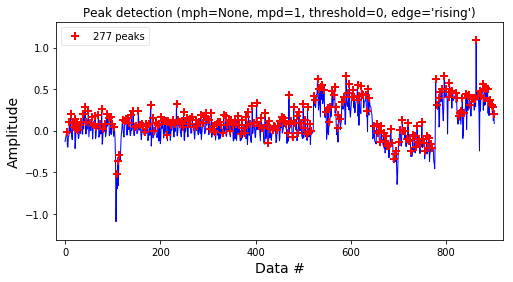

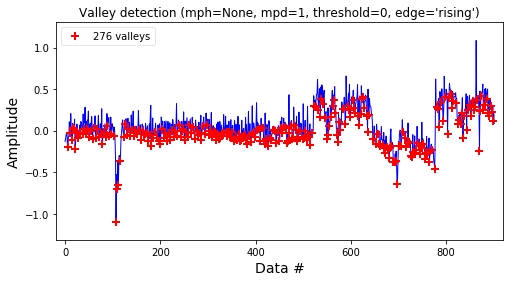

z_pca 0.17507560611016604


In [52]:
cols = ['x_pca', 'y_pca', 'z_pca']
all_avg_diff_1 = [[],[],[]]

for subj_i in all_subjects:
    df_walk_i = df_walk_1[df_walk_1['id']==subj_i]
    df_walk_i = df_walk_i.reset_index(drop=True)
    
    print(subj_i)
    
    for i in range(len(cols)):
        c = cols[i]
        
        peak_idx = detect_peaks(df_walk_i[c], show=True)    
        valley_idx = detect_peaks(df_walk_i[c], valley=True, show=True)

        peak_point = [df_walk_i.loc[i, c] for i in peak_idx]    
        valley_point = [df_walk_i.loc[i, c] for i in valley_idx]

        min_length = min(len(peak_idx), len(valley_idx))

        diff_peak_valley = [np.abs(peak_point[i] - valley_point[i]) for i in range(min_length)]
        avg_diff_pv = np.mean(diff_peak_valley)

#         print(diff_peak_valley)
        print(c, avg_diff_pv)
        
        all_avg_diff_1[i].append(avg_diff_pv)
        
all_avg_diff_1 = np.array(all_avg_diff_1)

1001


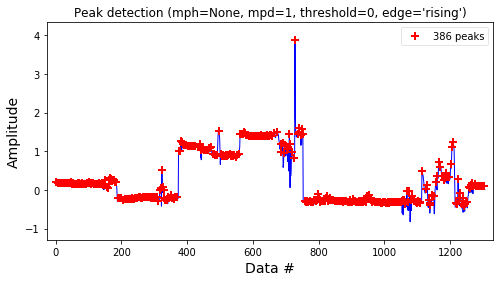

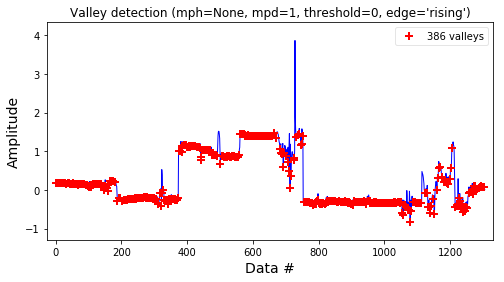

x_pca 0.08836704970186325


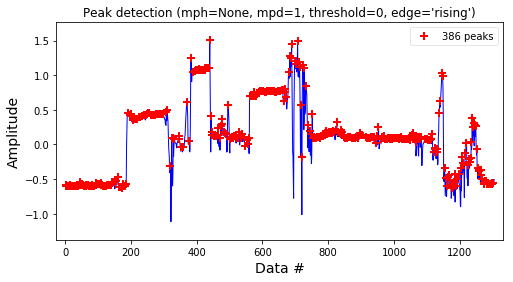

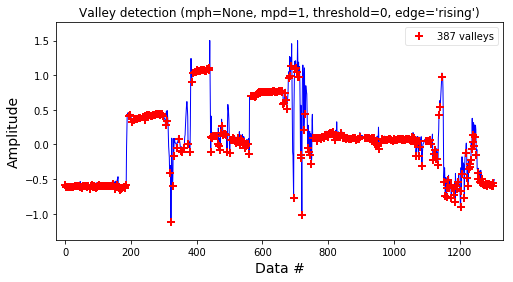

y_pca 0.09813867056234796


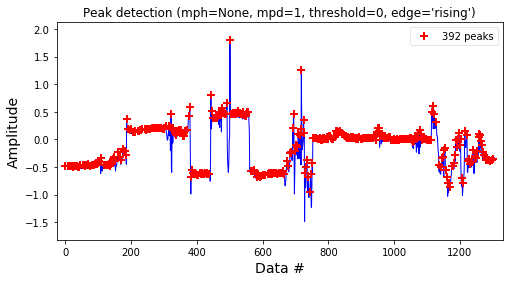

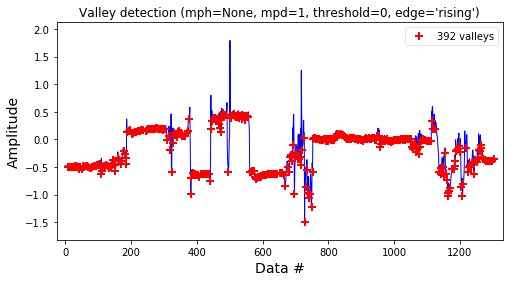

z_pca 0.10079548102453173
1002


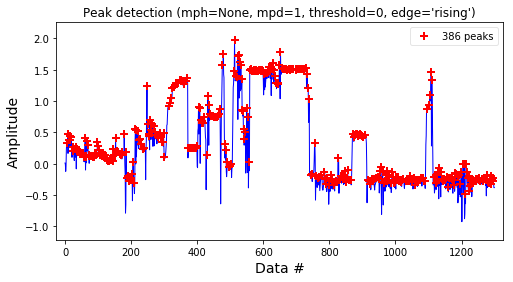

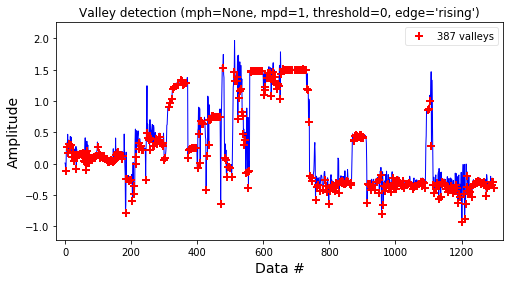

x_pca 0.15972964541221343


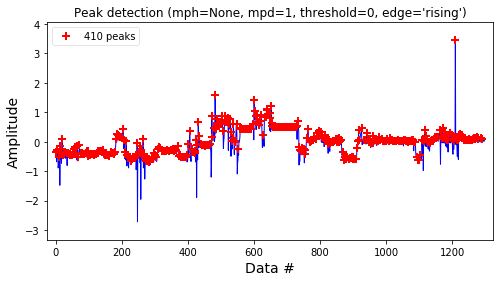

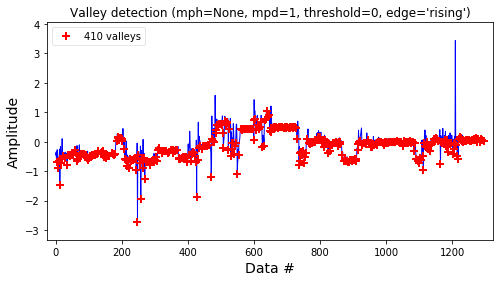

y_pca 0.1950120797113312


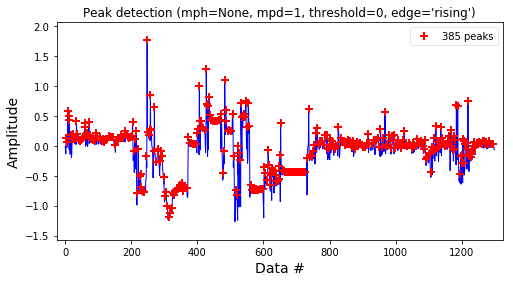

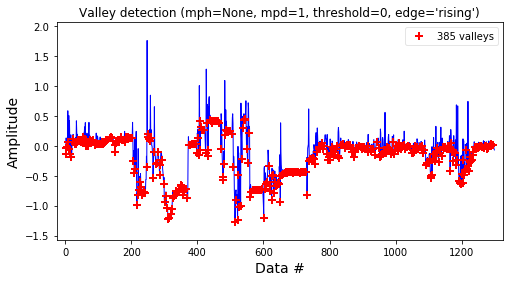

z_pca 0.17883559868489815
1003


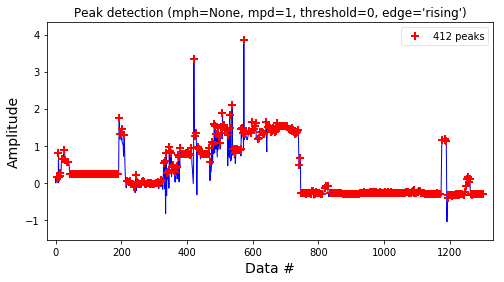

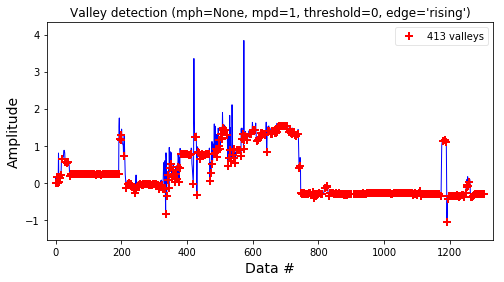

x_pca 0.11871729796869317


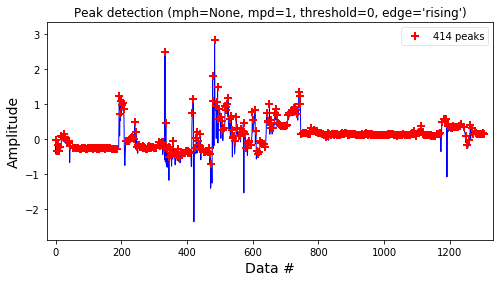

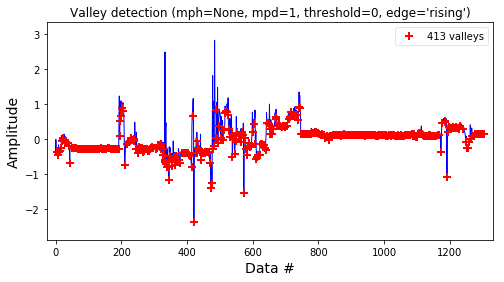

y_pca 0.15401759964665973


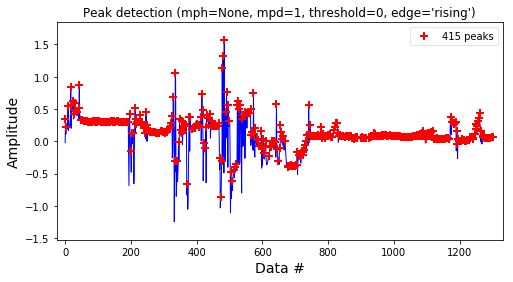

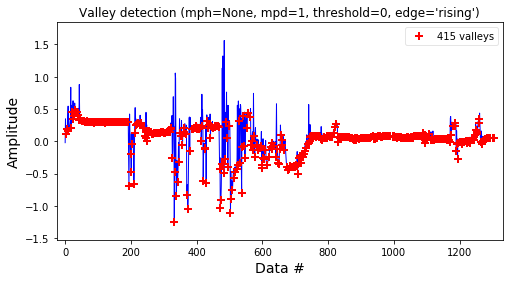

z_pca 0.12469179178990789
1004


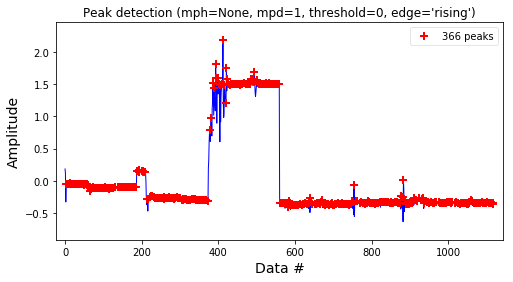

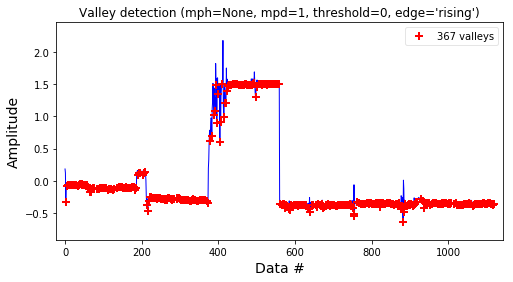

x_pca 0.04728706905326847


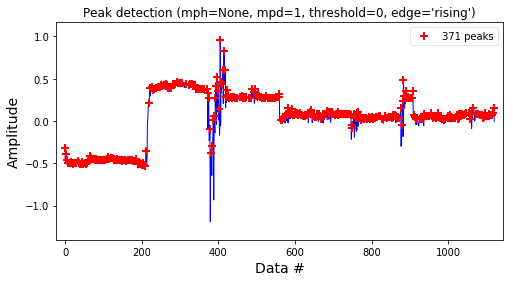

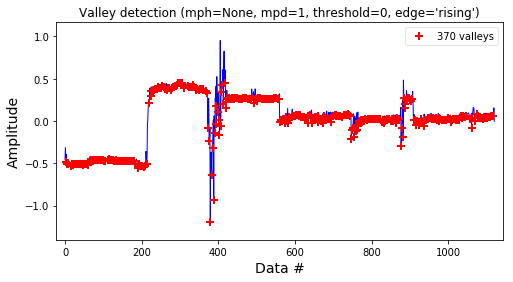

y_pca 0.05520749342297631


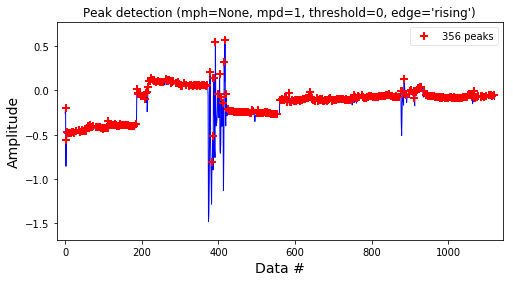

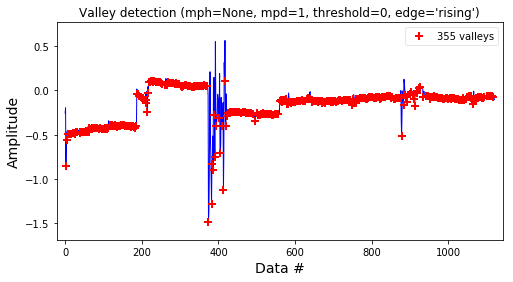

z_pca 0.04773120045531181
1005


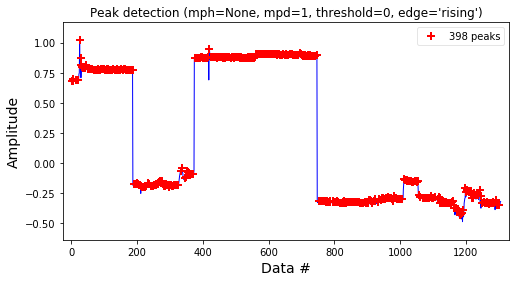

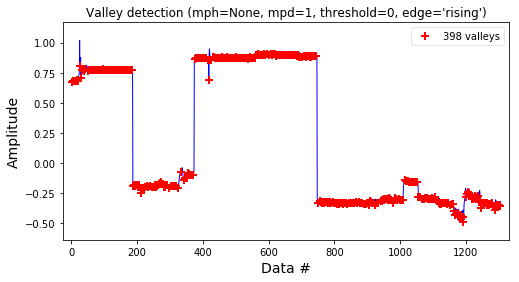

x_pca 0.017979694209007312


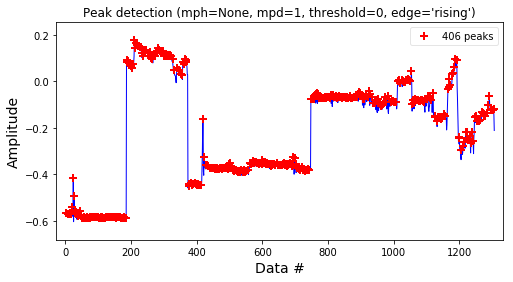

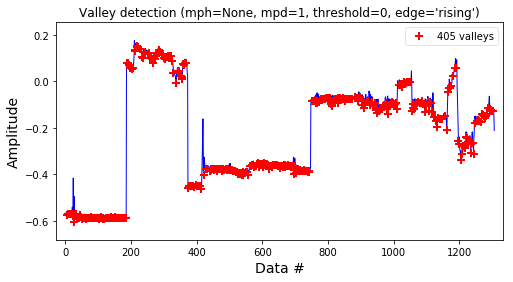

y_pca 0.01622117124067808


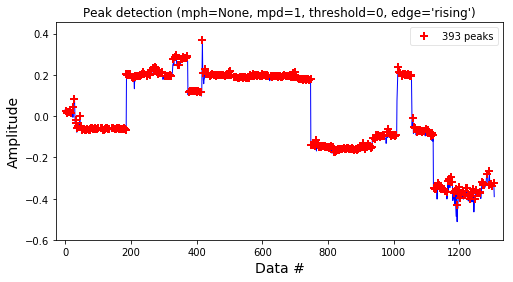

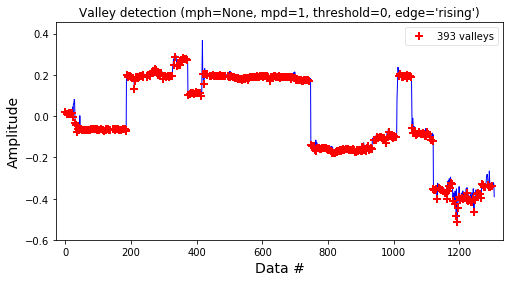

z_pca 0.014171832699287089
1006


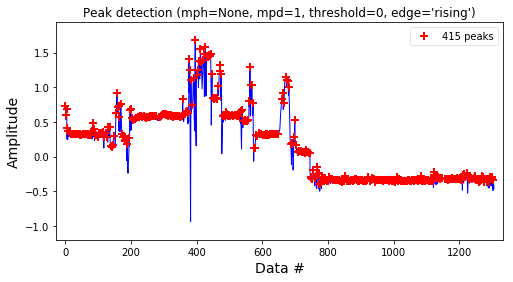

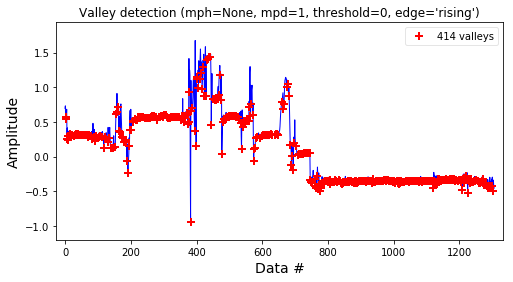

x_pca 0.0801196692135473


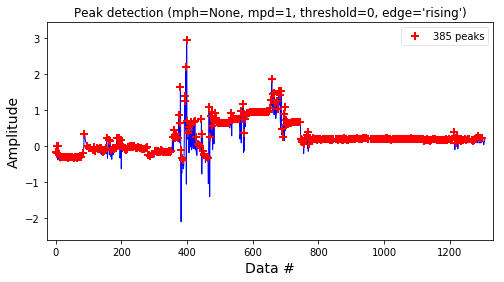

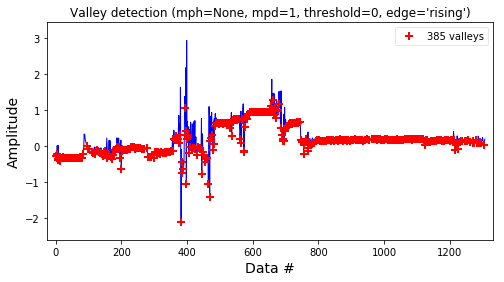

y_pca 0.1484890146564489


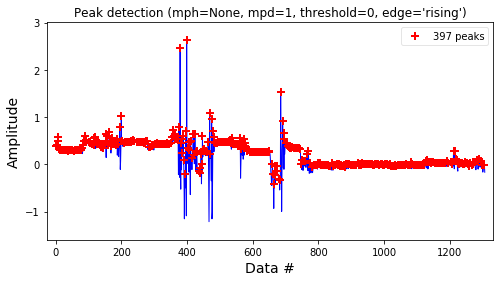

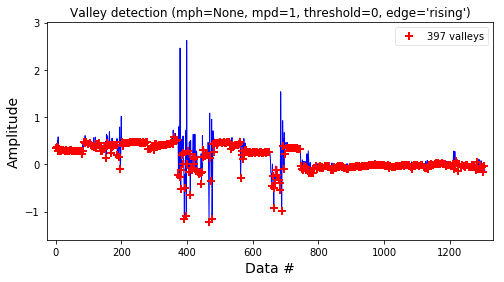

z_pca 0.12935456646597057
1007


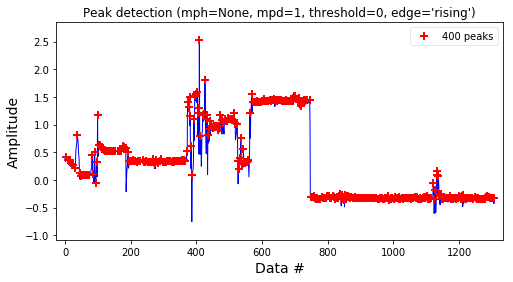

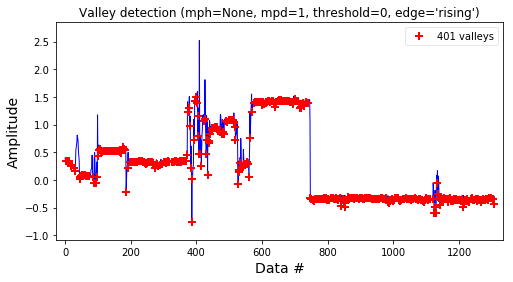

x_pca 0.08187550805237544


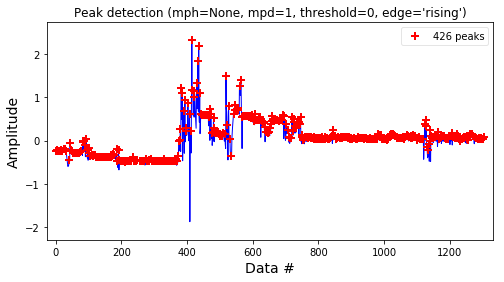

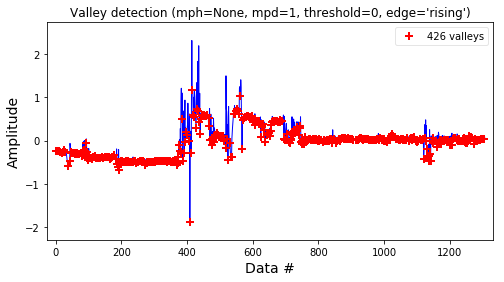

y_pca 0.12332501230743326


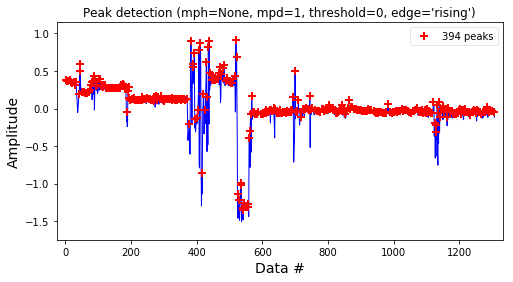

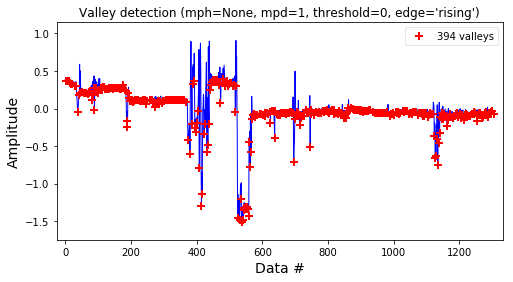

z_pca 0.09672946494645021
1008


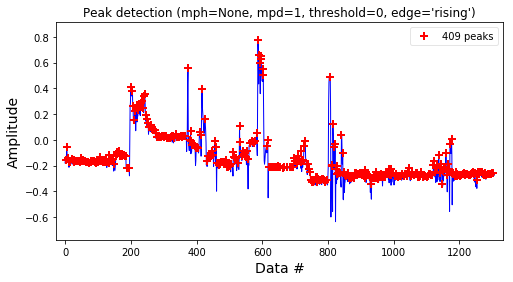

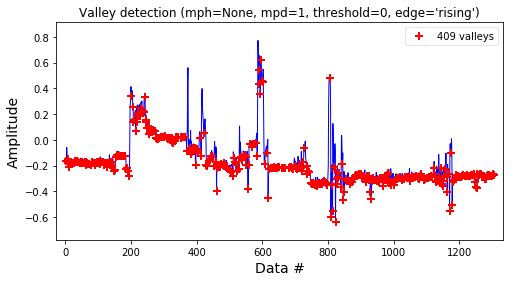

x_pca 0.05316333628859835


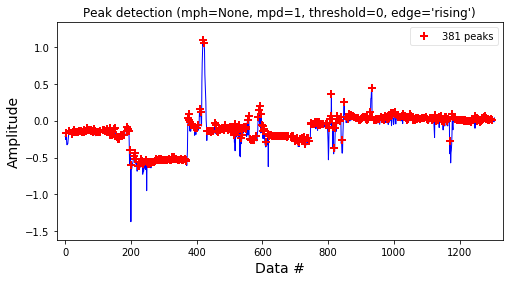

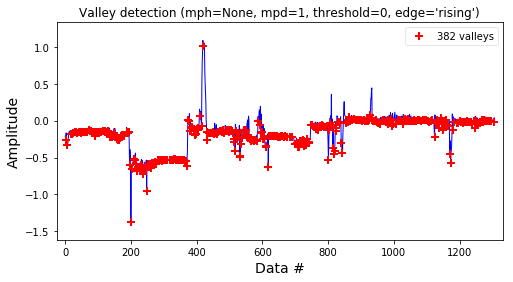

y_pca 0.06380649568225011


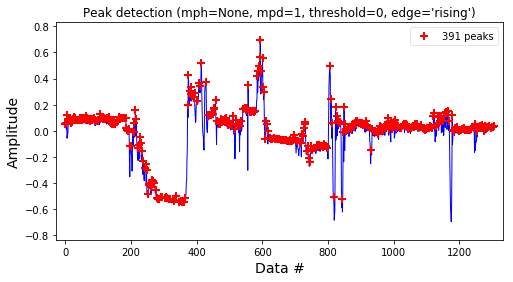

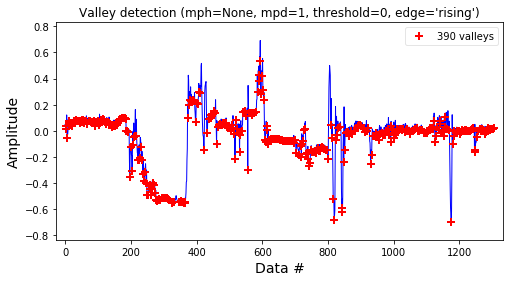

z_pca 0.0577939501316049
1009


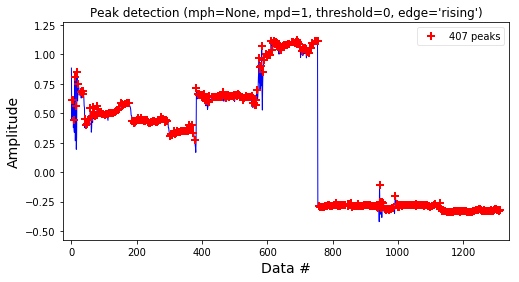

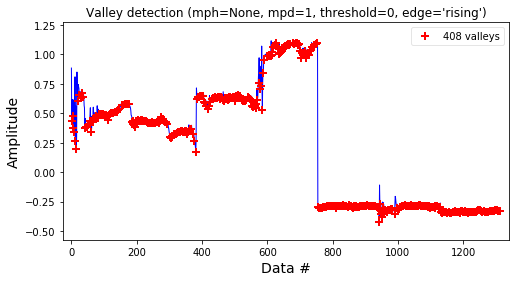

x_pca 0.02620940369359388


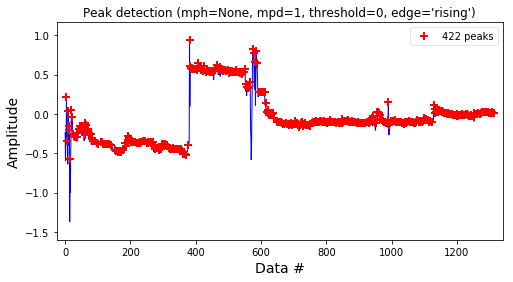

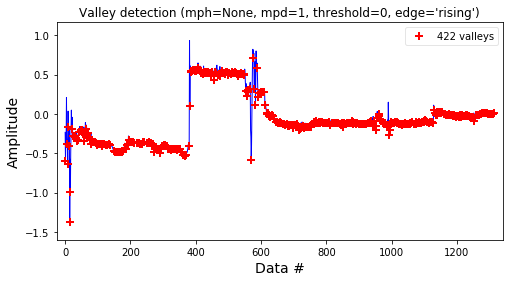

y_pca 0.04272775566502715


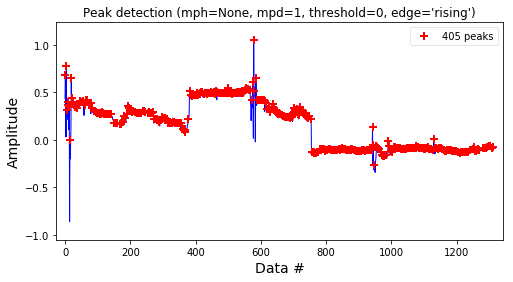

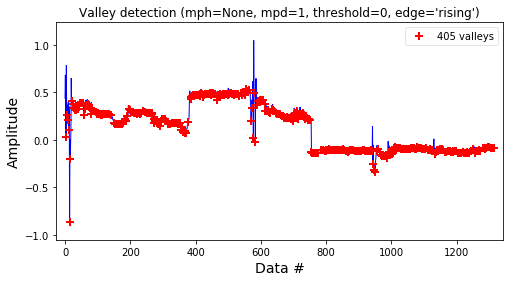

z_pca 0.032524938242201464
1010


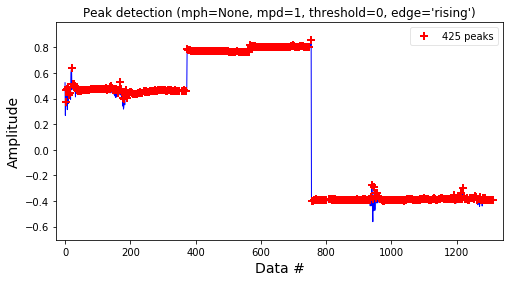

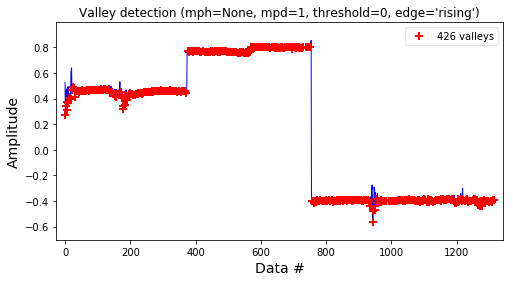

x_pca 0.013903935668085513


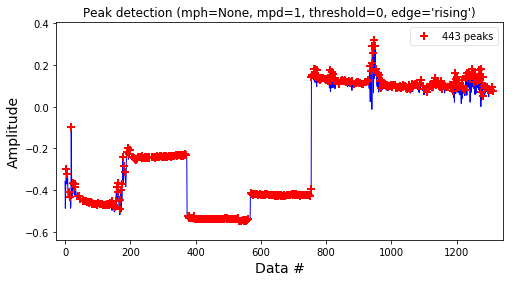

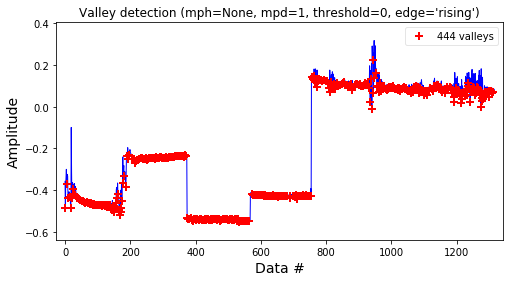

y_pca 0.022537492845655437


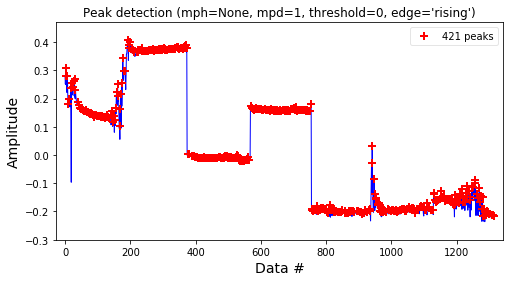

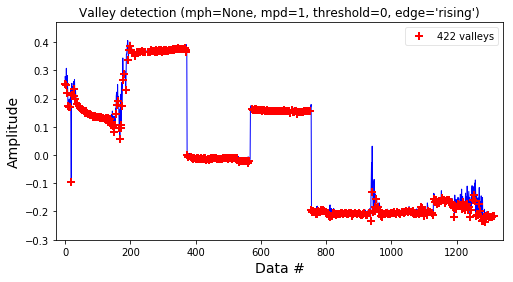

z_pca 0.015764981540440662
1011


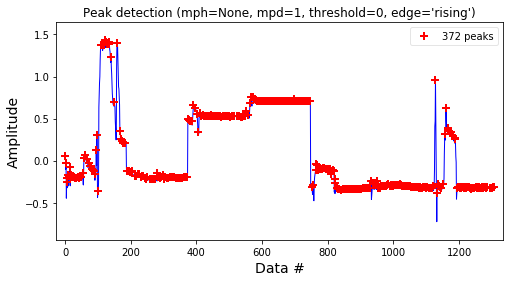

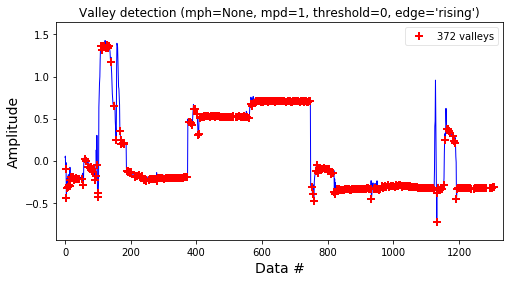

x_pca 0.03884592170125338


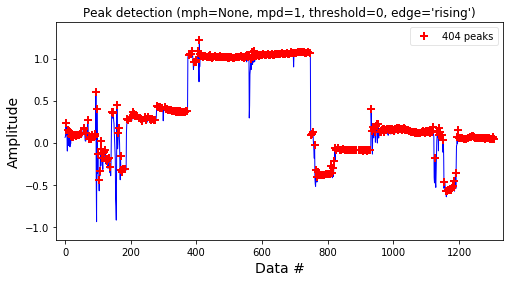

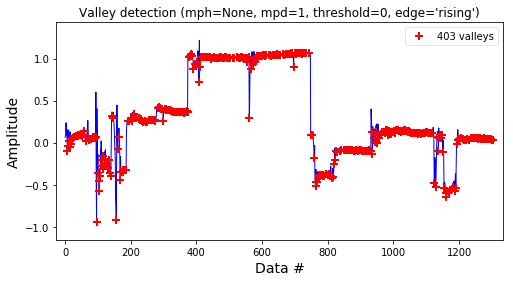

y_pca 0.05277833975202882


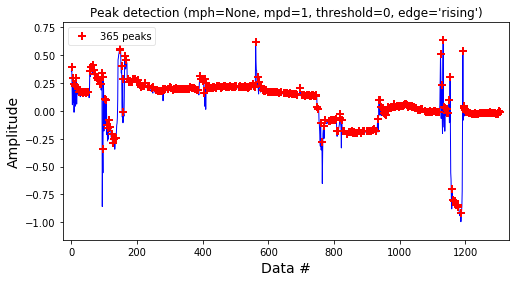

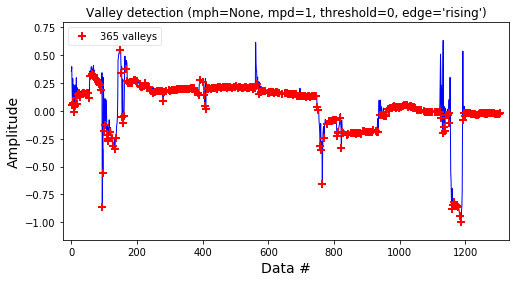

z_pca 0.04697641020909437
1012


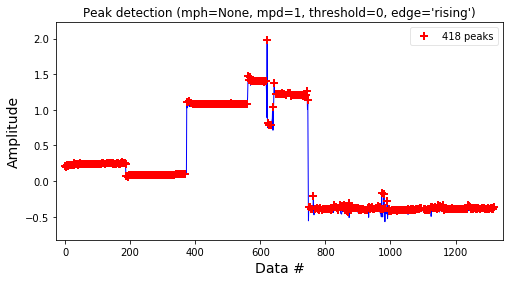

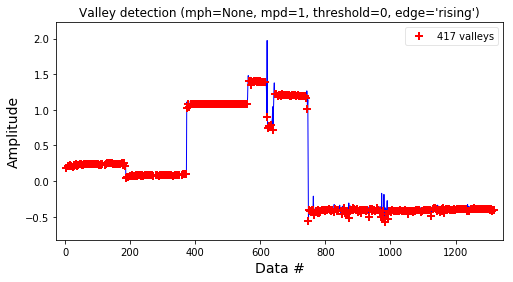

x_pca 0.028228357483270464


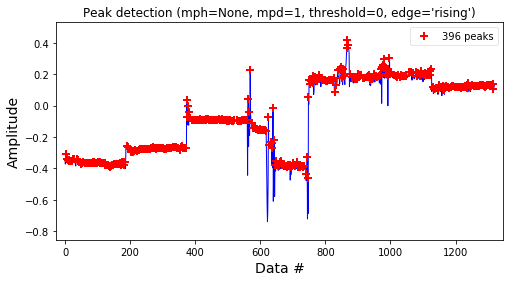

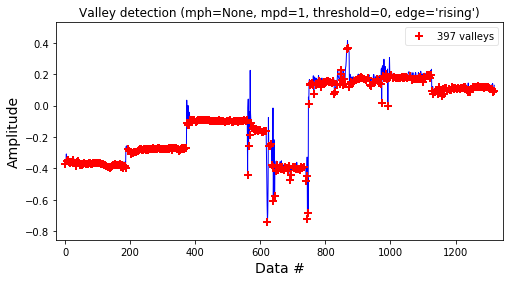

y_pca 0.028228226491664742


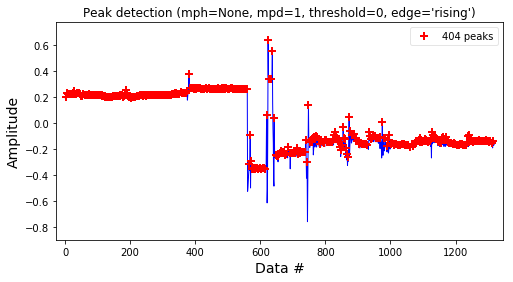

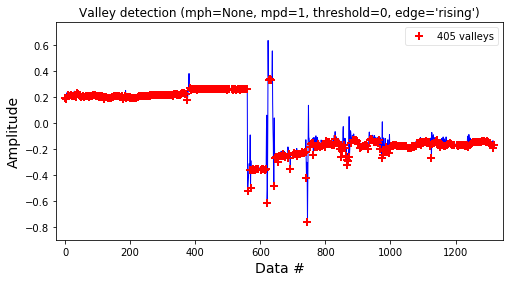

z_pca 0.0291902875023135
2002


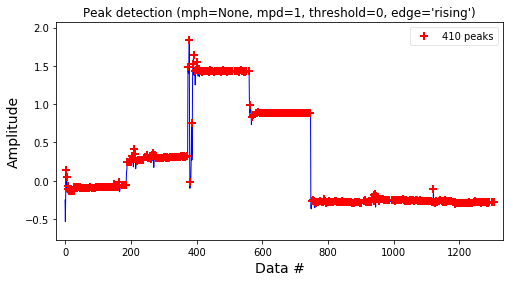

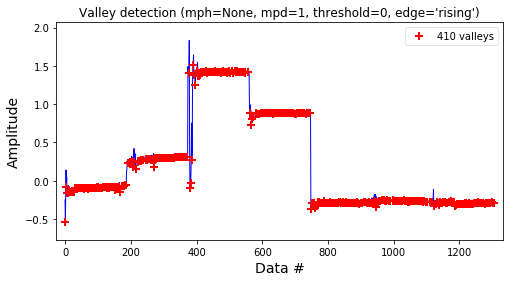

x_pca 0.028131228166152374


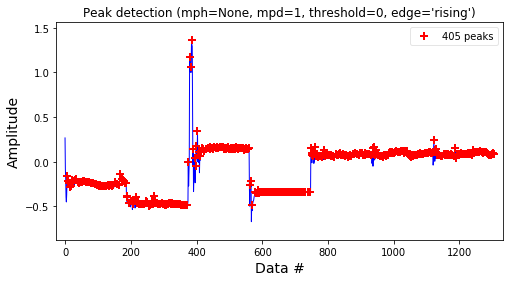

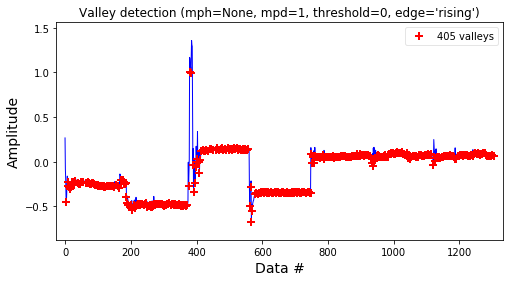

y_pca 0.03161683747855684


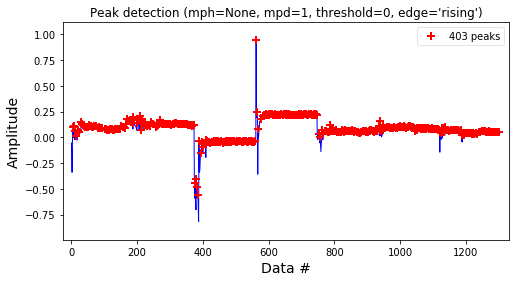

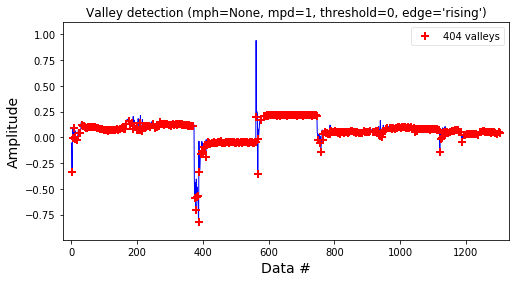

z_pca 0.02424755825277067


In [53]:
cols = ['x_pca', 'y_pca', 'z_pca']
all_avg_diff_nw_1 = [[],[],[]]

for subj_i in all_subjects:
    df_nonwalk_i = df_nonwalk_1[df_nonwalk_1['id']==subj_i]
    df_nonwalk_i = df_nonwalk_i.reset_index(drop=True)
    
    print(subj_i)
    
    for i in range(len(cols)):
        c = cols[i]
        
        peak_idx = detect_peaks(df_nonwalk_i[c], show=True)    
        valley_idx = detect_peaks(df_nonwalk_i[c], valley=True, show=True)

        peak_point = [df_nonwalk_i.loc[i, c] for i in peak_idx]    
        valley_point = [df_nonwalk_i.loc[i, c] for i in valley_idx]

        min_length = min(len(peak_idx), len(valley_idx)) - 1

        diff_peak_valley = [np.abs(peak_point[i] - valley_point[i]) for i in range(min_length)]
        avg_diff_pv = np.mean(diff_peak_valley)

    #     print(diff_peak_valley)
        print(c, avg_diff_pv)
        
        all_avg_diff_nw_1[i].append(avg_diff_pv)
        
all_avg_diff_nw_1 = np.array(all_avg_diff_nw_1)

In [54]:
aad_t_1 = all_avg_diff_1.transpose()

print('walking for normal people')
for i in range(len(aad_t_1)):
    print(all_subjects[i], aad_t_1[i])
    
aad_t_nw_1 = all_avg_diff_nw_1.transpose()

print()
print('non-walking for normal people')
for i in range(len(aad_t_nw_1)):
    print(all_subjects[i], aad_t_nw_1[i])

walking for normal people
1001 [0.43535274 0.33382823 0.2532051 ]
1002 [0.56962167 0.22883858 0.33626575]
1003 [0.51638937 0.23756564 0.27089079]
1004 [0.45507041 0.21662267 0.31097511]
1005 [0.46332539 0.3475872  0.31478981]
1006 [0.57352634 0.17633801 0.37150617]
1007 [0.41178152 0.22502543 0.23202885]
1008 [0.40158584 0.2884811  0.30704077]
1009 [0.59862009 0.25254944 0.26395065]
1010 [0.5168431  0.23069574 0.25570729]
1011 [0.28182244 0.18722612 0.19786474]
1012 [0.3867579  0.19929658 0.2535968 ]
2002 [0.28372936 0.21040356 0.17507561]

non-walking for normal people
1001 [0.08836705 0.09813867 0.10079548]
1002 [0.15972965 0.19501208 0.1788356 ]
1003 [0.1187173  0.1540176  0.12469179]
1004 [0.04728707 0.05520749 0.0477312 ]
1005 [0.01797969 0.01622117 0.01417183]
1006 [0.08011967 0.14848901 0.12935457]
1007 [0.08187551 0.12332501 0.09672946]
1008 [0.05316334 0.0638065  0.05779395]
1009 [0.0262094  0.04272776 0.03252494]
1010 [0.01390394 0.02253749 0.01576498]
1011 [0.03884592 0.0527

In [55]:
three_sec = 20   # 3 sec/0.16 sec = 18.75 time point
one_sec = 6      # 1 sec/0.16 sec = 6.25 time point

cols = ['x_pca', 'y_pca', 'z_pca']
threshold_1 = [0.28, 0.18, 0.18]

exceed_thres_1 = [[],[],[]]

for cl in range(len(cols)):
    c = cols[cl]
    
    for i in range(0, len(df_walk_1)-three_sec, one_sec):
        df_walk_i = [df_walk_1.loc[j, c] for j in range(i,i+three_sec)]
        
        peak_idx = detect_peaks(df_walk_i)    
        valley_idx = detect_peaks(df_walk_i, valley=True)

        peak_point = [df_walk_i[j] for j in peak_idx]    
        valley_point = [df_walk_i[j] for j in valley_idx]

        min_length = min(len(peak_idx), len(valley_idx))

        diff_peak_valley = [np.abs(peak_point[i] - valley_point[i]) for i in range(min_length)]
        diff_peak_valley = np.array(diff_peak_valley)
        
        exceed = len(diff_peak_valley[diff_peak_valley>=threshold_1[cl]])
        exceed_thres_1[cl].append(exceed)

In [56]:
three_sec = 20   # 3 sec/0.16 sec = 18.75 time point
one_sec = 6      # 1 sec/0.16 sec = 6.25 time point

cols = ['x_pca', 'y_pca', 'z_pca']
threshold_1 = [0.28, 0.18, 0.18]

exceed_thres_nw_1 = [[],[],[]]

for cl in range(len(cols)):
    c = cols[cl]
    
    for i in range(0, len(df_nonwalk_1)-three_sec, one_sec):
        df_nonwalk_i = [df_nonwalk_1.loc[j, c] for j in range(i,i+three_sec)]
        
        peak_idx = detect_peaks(df_nonwalk_i)    
        valley_idx = detect_peaks(df_nonwalk_i, valley=True)

        peak_point = [df_nonwalk_i[j] for j in peak_idx]    
        valley_point = [df_nonwalk_i[j] for j in valley_idx]

        min_length = min(len(peak_idx), len(valley_idx))

        diff_peak_valley = [np.abs(peak_point[i] - valley_point[i]) for i in range(min_length)]
        diff_peak_valley = np.array(diff_peak_valley)
        
        exceed = len(diff_peak_valley[diff_peak_valley>=threshold_1[cl]])
        exceed_thres_nw_1[cl].append(exceed)

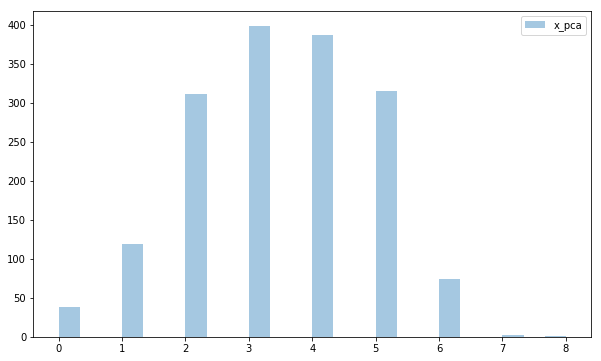

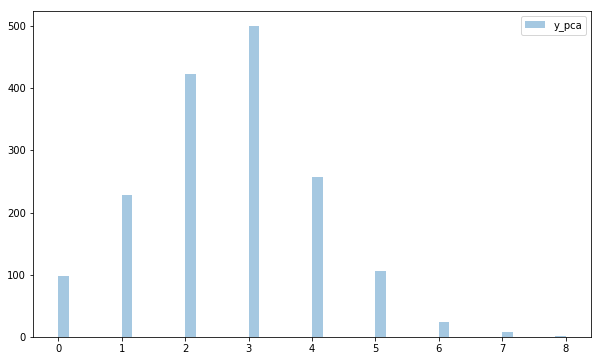

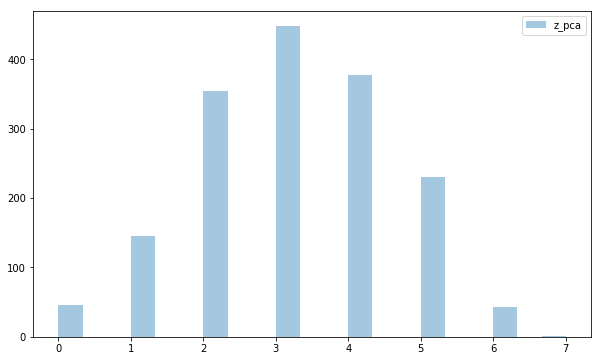

In [57]:
for i in range(3):
    f, axis = plt.subplots(figsize=(10,6))
    ax = sns.distplot(exceed_thres_1[i], kde=False, ax=axis, label=cols[i])
    ax.legend()

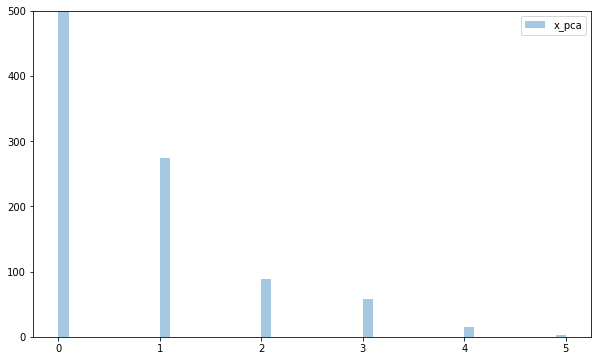

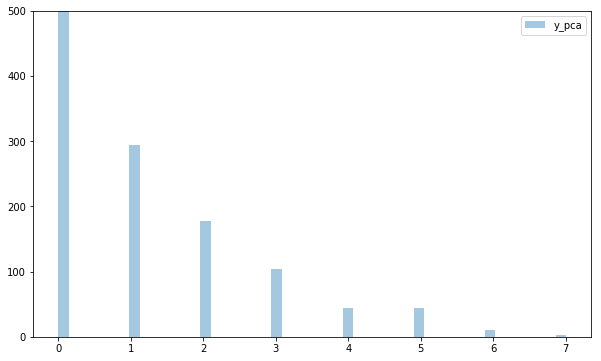

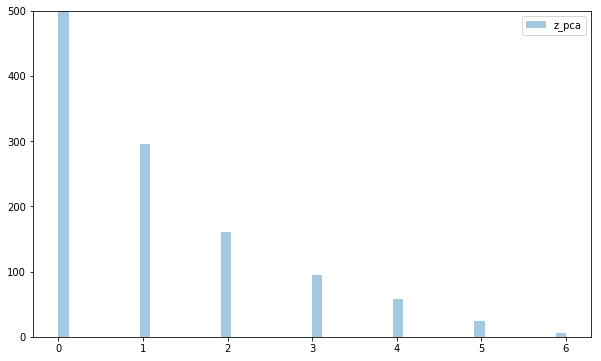

In [58]:
for i in range(3):
    f, axis = plt.subplots(figsize=(10,6))
    ax = sns.distplot(exceed_thres_nw_1[i], kde=False, ax=axis, label=cols[i])
    ax.legend()
    ax.set_ylim(0,500)

# K-Nearest Neighbors

In [59]:
nn_model = nn_classifier(X_train, y_train)
print("Finished training")

Finished training


In [60]:
filename = basepath + 'model/knn_model.pkl'
pickle.dump(nn_model, open(filename, 'wb'))

In [61]:
y_pred = nn_model.predict(X_test)

In [62]:
nn_model_2 = nn_classifier(X_tr, y_tr)
print("Finished training")

Finished training


In [63]:
y_pred_2 = nn_model_2.predict(X_te)

## Evaluation

In [64]:
%run eval_score.ipynb

In [65]:
LABELS = ['sit','sleep','stand','walk']

0.9128847157016171


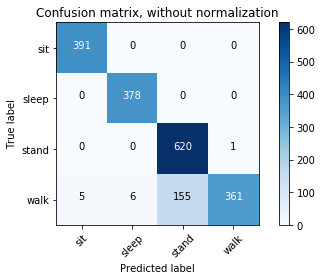

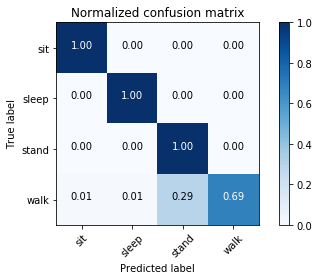

              precision    recall  f1-score   support

         sit       0.99      1.00      0.99       391
       sleep       0.98      1.00      0.99       378
       stand       0.80      1.00      0.89       621
        walk       1.00      0.69      0.81       527

   micro avg       0.91      0.91      0.91      1917
   macro avg       0.94      0.92      0.92      1917
weighted avg       0.93      0.91      0.91      1917



In [66]:
acc = accuracy_score(y_test, y_pred)
print(acc)

show_conf_matrix(y_test, y_pred, LABELS)
show_clf_report(y_test, y_pred, LABELS)

0.9085923217550275


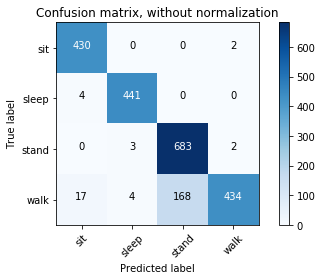

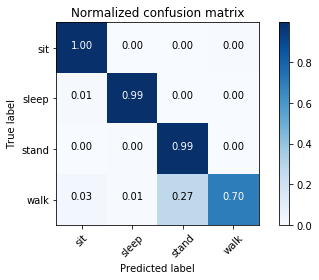

              precision    recall  f1-score   support

         sit       0.95      1.00      0.97       432
       sleep       0.98      0.99      0.99       445
       stand       0.80      0.99      0.89       688
        walk       0.99      0.70      0.82       623

   micro avg       0.91      0.91      0.91      2188
   macro avg       0.93      0.92      0.92      2188
weighted avg       0.92      0.91      0.91      2188



In [67]:
acc = accuracy_score(y_te, y_pred_2)
print(acc)

show_conf_matrix(y_te, y_pred_2, LABELS)
show_clf_report(y_te, y_pred_2, LABELS)

# Walk Algorithm

In [68]:
%run classifier_alg.ipynb

In [69]:
cols = ['x_pca', 'y_pca', 'z_pca']
xyz_pca = df_rpy[cols].to_dict(orient='split')['data']

In [70]:
xyz_pca

[[-0.6765969740315816, 0.6424545957026714, -0.05177527866888847],
 [-0.6901866952428307, 0.5985786071753403, -0.028977954762410878],
 [-0.6706982333880855, 0.533802368383864, -0.03789263555831788],
 [-0.7106814989243446, 0.6273141215715147, -0.09075017268729958],
 [-0.6921130827597696, 0.6053228698768729, -0.042960612055149075],
 [-0.6731993451994778, 0.6175351460609538, -0.03622699826909998],
 [-0.6917819485115282, 0.5868862265955368, -0.018501683519913992],
 [-0.6962062276843274, 0.604111607036424, -0.031216836411845632],
 [-0.7018676959182196, 0.5922845663320353, -0.009181317593041183],
 [-0.7021295848223816, 0.5834258225308488, -0.009149479364827757],
 [-0.6789391065160524, 0.5356823265806665, 0.027511651957241846],
 [-0.7131752999053943, 0.581233353950147, -0.035201388767624395],
 [-0.7187219670826691, 0.5921911794759555, -0.09888280922520735],
 [-0.7096834230052972, 0.5904356706366812, -0.07804416907101325],
 [-0.7011147466219686, 0.569384604947585, -0.05340297745213609],
 [-0.70

In [83]:
# classify walking
walk = calc_walk(X_all_p)
walk_its = intersection_walk(walk)
walk_pred_p = calc_walk_periods(walk_its)

# walk_stairs_exact_p = get_exact_walk_stairs(y_all)
walk_exact_p = get_exact_walk(y_all_p)
    
walk_pred = binarize_walk_prd(walk_pred_p, y_all_p)
# walk_stairs_exact = binarize_walk_prd(walk_stairs_exact_p, y_all)
walk_exact = binarize_walk_prd(walk_exact_p, y_all_p)

## Walk Algorithm Evaluation

In [84]:
walk_lbl = ['NaN','walk']

0.9349881796690307


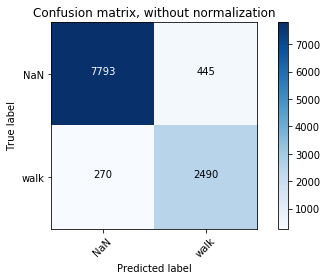

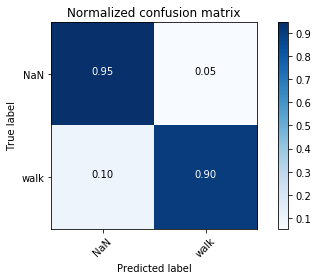

              precision    recall  f1-score   support

         NaN       0.97      0.95      0.96      8238
        walk       0.85      0.90      0.87      2760

   micro avg       0.93      0.93      0.93     10998
   macro avg       0.91      0.92      0.92     10998
weighted avg       0.94      0.93      0.94     10998



In [85]:
acc = accuracy_score(walk_exact, walk_pred)
print(acc)

show_conf_matrix(walk_exact, walk_pred, walk_lbl)
show_clf_report(walk_exact, walk_pred, walk_lbl)

# Combine SVM and Walk Algorithm

In [86]:
y_pred_new = combine(X_test, y_pred)

0.4074074074074074


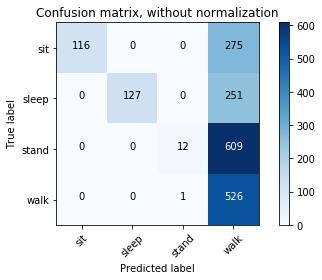

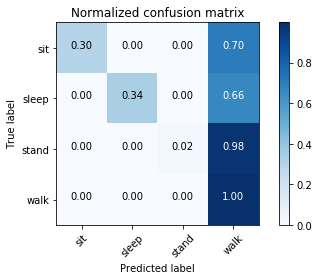

              precision    recall  f1-score   support

         sit       1.00      0.30      0.46       391
       sleep       1.00      0.34      0.50       378
       stand       0.92      0.02      0.04       621
        walk       0.32      1.00      0.48       527

   micro avg       0.41      0.41      0.41      1917
   macro avg       0.81      0.41      0.37      1917
weighted avg       0.79      0.41      0.34      1917



In [87]:
acc = accuracy_score(y_test, y_pred_new)
print(acc)

show_conf_matrix(y_test, y_pred_new, LABELS)
show_clf_report(y_test, y_pred_new, LABELS)

# Test Model with Some Subjects

In [76]:
%run test_model.ipynb

In [77]:
filename = basepath + 'model/knn_model.pkl'

model = pickle.load(open(filename,'rb'))

In [78]:
all_subjects = [str(i) for i in range(1001,1009)]
all_subjects.append('2001')
all_subjects.append('2002')

Loading 1001's data
Finished prediction
0.3798670465337132


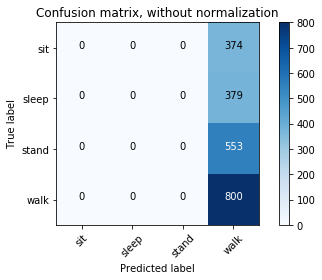

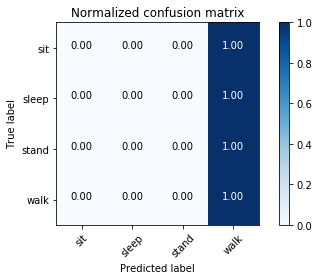

              precision    recall  f1-score   support

         sit       0.00      0.00      0.00       374
       sleep       0.00      0.00      0.00       379
       stand       0.00      0.00      0.00       553
        walk       0.38      1.00      0.55       800

   micro avg       0.38      0.38      0.38      2106
   macro avg       0.09      0.25      0.14      2106
weighted avg       0.14      0.38      0.21      2106



C:\Users\fifamd\Anaconda3\envs\tf\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\fifamd\Anaconda3\envs\tf\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\fifamd\Anaconda3\envs\tf\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\fifamd\Anaconda3\envs\tf\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precisio

TypeError: string indices must be integers

In [79]:
call_functions(all_subjects)

In [ ]:
all_subjects = [str(i) for i in range(3001,3006)]

call_functions(all_subjects)

In [ ]:
s = '3004'
df_sid = load_actual_timer(s)
df_test = load_data(s, df_sid)

X_vis_imp, ts_list_imp = preprocess_data(df_test, pca)
df_y = predict(X_vis_imp, ts_list_imp)

df_test, df_y = prepare_actual_lb(df_test, df_y, df_sid)

actual_periods = get_actual_periods(df_test)
pred_periods = get_predicted_periods(df_y)
pp_all_run = postprocess_predicted(pred_periods, df_y)

df_y['y_pred'] = pd.Series(pp_all_run)
pp_periods = get_predicted_periods(df_y)
plot_highlighted(s, df_test, pred_periods, pp_periods, actual_periods)

evaluate(df_y)

In [ ]:
LABELS = ['sit', 'sleep', 'stand', 'walk']

df_y_notnull = df_y.dropna()
df_y_notnull = df_y_notnull.reset_index(drop=True)

actual_y = list(df_y_notnull['y_actual'])
pred_y = list(df_y_notnull['y_pred'])

last = len(pred_y)

for i in range(len(pred_y)):
    if(pred_y[i]==-1):
        last = i
        break

pred_y = pred_y[:last]
actual_y = actual_y[:last]

acc = accuracy_score(actual_y, pred_y)
print(acc)

show_conf_matrix(actual_y, pred_y, LABELS)
# show_clf_report(actual_y, pred_y, LABELS)

labels_list = [0,1,2,3]
report = classification_report(actual_y, pred_y, labels_list, output_dict=True)
print(report['macro avg'])

In [ ]:
df_test['x'][2200:].plot()

plt.show()

# Display Table

In [ ]:
from prettytable import PrettyTable

In [ ]:
print(s)
print(df_y)

In [ ]:
label_period = []
period_list = [[] for i in range(len(LABELS))]

first = 0
keep = 0

for i in range(len(df_y)):
    if(calc_sec(df_y.loc[i]['timestamp'].split(' ')[1])>=calc_sec(df_sid.loc[0]['timestamp'].split(' ')[1]) and
       calc_sec(df_y.loc[i]['timestamp'].split(' ')[1])<=calc_sec(df_sid.loc[len(df_sid)-1]['timestamp'].split(' ')[1])):
        
        keep_lb = df_y.loc[keep]['y_pred']

        if(keep_lb!=df_y.loc[i]['y_pred']):
            label_period.append([df_y.loc[keep]['timestamp'], df_y.loc[i-1]['timestamp'], 
                                 df_y.loc[i-1]['y_pred']])

            period_list[df_y.loc[i-1]['y_pred']].append([df_y.loc[keep]['timestamp'], df_y.loc[i-1]['timestamp']])

            keep = i

In [ ]:
labels_list = ['sit', 'sleep', 'stand', 'walk']
headers = ['start', 'end', 'pred']

t = PrettyTable(headers)

for row in label_period:
#     if(calc_sec(row[1].split(' ')[1])-calc_sec(row[0].split(' ')[1])>1):
    t.add_row([row[0], row[1], labels_list[row[2]]])

In [ ]:
print(t)

In [ ]:
print(len(label_period))

label_cnt_list = [0 for i in range(len(labels_list))]
for lb_p in label_period:
    label_i = lb_p[2]
    
    label_cnt_list[label_i] += 1

activity_changes = []
for i in range(len(labels_list)):
    activity_changes.append([labels_list[i], label_cnt_list[i]])
    
print(activity_changes)

In [ ]:
headers = ['Label', 'Activities Count']
tabl_act_chng = PrettyTable(headers)

for ac in activity_changes:
    tabl_act_chng.add_row([ac[0], ac[1]])
    
tabl_act_chng.add_row(['', ''])
tabl_act_chng.add_row(['total changes', len(label_period)])

In [ ]:
print(tabl_act_chng)

## Active Inactive AC (ALL)

In [ ]:
headers = ['Label', 'Activities Count']
tabl_act = PrettyTable(headers)
inactive_table = []
active_table = []

sum = 0
sum_2 = 0
for ac in activity_changes:
    if(ac[0] == 'sit' or ac[0] == 'sleep'):
        sum += ac[1]
    else :
        sum_2 += ac[1]

tabl_act.add_row(['Inactive', sum])
tabl_act.add_row(['Active', sum_2])

In [ ]:
print(tabl_act)

# Convert Time to String Method

In [ ]:
def convert_time_to_string(sec):
    minute = math.floor(sec/60)
    sec = int(sec%60)

    time_string = str(minute) + ':' + str(sec)
    if(sec<10):
        time_string = str(minute) + ':0' + str(sec)
    
    return time_string

# Predicted Duration

In [ ]:
total_secs = []
for i in range(len(period_list)):    
    secs = 0
    for p_i in period_list[i]:
        sec = calc_sec(p_i[1].split(' ')[1]) - calc_sec(p_i[0].split(' ')[1])
        secs += sec
    
    secs = round(secs, 3)
    total_secs.append(secs)
    
percent_secs = [round(t/np.sum(total_secs)*100, 3) for t in total_secs]

tb = PrettyTable(['Label', 'Minutes', 'Percentage', 'Activity Count'])

for i in range(len(LABELS)):
    tb.add_row([labels_list[i], convert_time_to_string(total_secs[i]), percent_secs[i], label_cnt_list[i]])

tb.add_row(['', '', '',''])
tb.add_row(['total', convert_time_to_string(round(np.sum(total_secs), 3)), 
            round(np.sum(percent_secs), 3), len(label_period)])

# Actual Duration

In [ ]:
df_lb = df_sid.groupby('label')

dura_dict = {}
for lb in labels_list:
    dura_dict[lb] = 0

idx = list(df_sid.index)
for i in range(len(labels_list)):
    lb = labels_list[i]
    df_temp = df_lb.get_group(lb)
    df_temp = df_temp.reset_index(drop=True)
        
    if(lb=='downstairs' or lb=='upstairs'):
        lb = 'walk'
    
    for j in range(len(df_temp)):
        dura_dict[lb] += calc_sec(df_temp.loc[j]['duration'])
        
total_dura = np.sum([dura_dict[lb] for lb in labels_list])

percent_list = []
        
tabl = PrettyTable(['Label', 'Minutes', 'Percentage'])
for lb in labels_list:
    percent = round(dura_dict[lb]/total_dura*100, 3)
    tabl.add_row([lb, convert_time_to_string(dura_dict[lb]), round(dura_dict[lb]/total_dura*100, 3)])
    
    percent_list.append(percent)
    
tabl.add_row(['', '', ''])    
tabl.add_row(['total', convert_time_to_string(total_dura), round(np.sum(percent_list), 3)])

# Activity Durations Table

In [ ]:
print('Prediction')
print(tb)

print('Actual')
print(tabl)

# Bar Chart for Every 5 Minutes

In [ ]:
s_idx = 0
f_idx = 1
lb_idx = 2

## Separate Each 5 Minutes

In [ ]:
fivemin = 60*5
new_label_period = []

start_time = calc_sec(label_period[0][s_idx].split(' ')[1])
finish_time = calc_sec(label_period[-1][f_idx].split(' ')[1])

floor_start = start_time - (start_time%fivemin)
ceil_finish = finish_time - (finish_time%fivemin) + fivemin

print(calc_ts(floor_start), calc_ts(ceil_finish))

tm_s = floor_start
tm_f = floor_start + fivemin
date = label_period[0][s_idx].split(' ')[0]

for prd in label_period:
    if(calc_sec(prd[f_idx].split(' ')[1])>=tm_f):
        new_prd = [prd[s_idx], date + ' ' + calc_ts(tm_f), prd[lb_idx]]
        new_label_period.append(new_prd)
        
        tm_s += fivemin
        tm_f += fivemin
    else:
        new_label_period.append(prd)
                
    if(calc_sec(prd[s_idx].split(' ')[1])<tm_s):
        new_prd = [date + ' ' + calc_ts(tm_s), prd[f_idx], prd[lb_idx]]
        new_label_period.append(new_prd)

In [ ]:
all_periods_label = []

for t_i in range(int(floor_start), int(ceil_finish), fivemin):
    period_lb = [0 for i in range(len(LABELS))]
    for prd in new_label_period:
        if(calc_sec(prd[s_idx].split(' ')[1])>=t_i and calc_sec(prd[f_idx].split(' ')[1])<=t_i+fivemin):
            period_lb[prd[lb_idx]] += calc_sec(prd[f_idx].split(' ')[1])-calc_sec(prd[s_idx].split(' ')[1])
            period_lb[prd[lb_idx]] = round(period_lb[prd[lb_idx]], 3)
            
    all_periods_label.append(period_lb)

In [ ]:
df_all = pd.DataFrame(all_periods_label, columns=labels_list)

## Plot Bar Graph

In [ ]:
pos = list(range(len(df_all['sit'])))
width = 0.2
colors = ['crimson','gold','lime','dodgerblue']

fig, ax = plt.subplots(figsize=(10,5))

for i in range(len(LABELS)):
    plt.bar([p + i*width for p in pos],
            df_all[labels_list[i]],
            width,
            alpha=0.5,
            color=colors[i],
            label=labels_list[i])
    
ax.set_xticks([p + 1.5 * width for p in pos])

xtick_labels = [calc_ts(floor_start + i*fivemin) + '-' + calc_ts(floor_start + (i+1)*fivemin)
                for i in range(len(df_all))]
ax.set_xticklabels(xtick_labels)

ax.set_ylabel('Time (sec)')

plt.xlim(min(pos)-width, max(pos)+width*4)
plt.legend(loc='upper left')
plt.title('Activity Summary for Subject ID: ' + s)

plt.show()